# Исследование объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель** - провести исследовательский анализ данных датасета с объявлениями о продаже квартир.

**Задачи**:

* загрузить данные и изучить общую информацию о датасете;

* предобработать данные;

* создать новые признаки в датасете: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах;

* изучить параметры объектов недвижимости;

* изучить, как быстро продавались квартиры после публикации объявления о продаже;

* выявить факторы, больше всего влияющие на общую  (полную) стоимость квартиры;

* определить среднюю стоимость одного квадратного метра в десяти населенных пунктах с самым большим числом объявлений;

* для квартир из Санкт-Петербурга вычислить среднюю стоимость одного квадратного метра в зависимости от расстояния до центра города.

### Откройте файл с данными и изучите общую информацию.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# убираем 'красные' предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
# подгружаем файл с данными
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
    print('Dataset load from Practicum cloud')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    path1 = '/content/drive/MyDrive/mydata/real_estate_data.csv'
    data = pd.read_csv(path1)
    print('Dataset load from GoogleDrive')

Mounted at /content/drive
Dataset load from GoogleDrive


In [3]:
# Для того, чтобы обеспечить "читаемость" всех столбцов,
# применим функцию pd.set_option()
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [4]:
# изучаем первые пять строк датасета
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [5]:
data.shape, data.size

((23699, 1), 23699)

Данные в датасете склеены (не разбиты на колонки)

In [6]:
# применим параметр sep для разделения колонок датасета
# и выведем первые пять строк датасета

# подгружаем файл с данными
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    print('Dataset load from Practicum cloud')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    path1 = '/content/drive/MyDrive/mydata/real_estate_data.csv'
    data = pd.read_csv(path1, sep = '\t')
    print('Dataset load from GoogleDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset load from GoogleDrive


Столбцы датасета отображаются корректно

In [7]:
# Проверим названия столбцов датасета на возможные ошибки
data.columns


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Найден один столбец, название которого требуется изменить: 'cityCenters_nearest'

In [8]:
# изменим название столбца 'cityCenters_nearest'
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, \
            inplace = True)
#и првоерим произведенные изменения
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Заголовки всех столбцов соответствуют установленным требованиям

In [9]:
# изучаем общую информацию о датасете
data.shape, data.size

((23699, 22), 521378)

Датасет включает 23699 строк, 22 столбца, 521378 ячеек

In [10]:
# изучим тип данных в столбцах
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

В ходе предобработки данных в двух столбцах необходимо будет изменить тип данных. К проблемным столбцам относятся: (1) 'first_day_exposition' с типом данных object (необходимо сменить на тип datetime); (2) 'is_apartment' с типом данных object (необходимо сменить на bool)

In [11]:
# изучим общую информацию о датасете
data.info

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

В столбцах просматриваются пропуски, что ожидаемо. В рамках предобработки данных необходимо будет более внимательно изучить каждый столбец

In [12]:
# изучим случайную выборку из 5 строк из датасета методом .sample()
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20352,7,11200000.0,118.0,2017-02-10T00:00:00,4,3.34,7.0,68.4,5,NaN,False,False,18.0,NaN,Санкт-Петербург,26345.0,5048.0,3.0,384.0,1.0,84.0,554.0
9566,5,3800000.0,34.4,2017-10-19T00:00:00,1,2.60,10.0,19.0,9,NaN,False,False,6.1,1.0,Санкт-Петербург,17944.0,11212.0,0.0,NaN,0.0,NaN,30.0
15183,4,2990000.0,74.1,2018-02-10T00:00:00,3,2.50,5.0,42.3,3,NaN,False,False,8.3,2.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,12,4900000.0,55.0,2016-05-25T00:00:00,2,2.60,16.0,31.0,13,NaN,False,False,10.0,0.0,Санкт-Петербург,18449.0,21873.0,0.0,NaN,2.0,922.0,49.0
2901,1,1900000.0,55.0,2018-07-24T00:00:00,3,2.50,3.0,40.0,1,NaN,False,False,5.0,NaN,Приозерск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Дополнительной информации выборка методом .sample() не предоставила

In [13]:
# изучим общие статистические данные о датасете
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В датасете есть объект недвижимости, проданный за 12 с небольшим тысяч рублей. Есть объект с жилой площадью в два квадратных метра. Вероятно, в отдаленных населенных пунктах. В целом в объявлениях о продаже преобладают предложения жилья с небольшой жилой площадью до 30 кв. метров. Есть квартира с высотой потолка в 100 метров. Выбросы данных будут изучены далее в рамках 1 и 2 части

In [14]:
# оценим количество пропусков в столбцах датасета
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
# оценим долю в % пропусков в строках столбцов от общего количества значений
data.isnull().sum() / data.shape[0] * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Наибольшее количество пропущенных значений наблюдается в стобцах 'is_apartment' (88,%), 'parks_nearest' (65,9%), 'ponds_nearest' (61,6%). Значительное число пропусков наблюдается в столбцах 'ceiling_height' (38,8%), 'balcony' (48,6%). Преимущественно столбцы, который в первую очередь необходимы для анализа, имеют не очень большое число пропусков или вовсе их не имеют. Особое внимание на этапе предобработки данных потребуется уделить столбцам 'living_area' (8% пропусков), 'kitchen_area' (9,6% пропусков) и особенно 'city_centers_nearest' (23,4% пропусков)

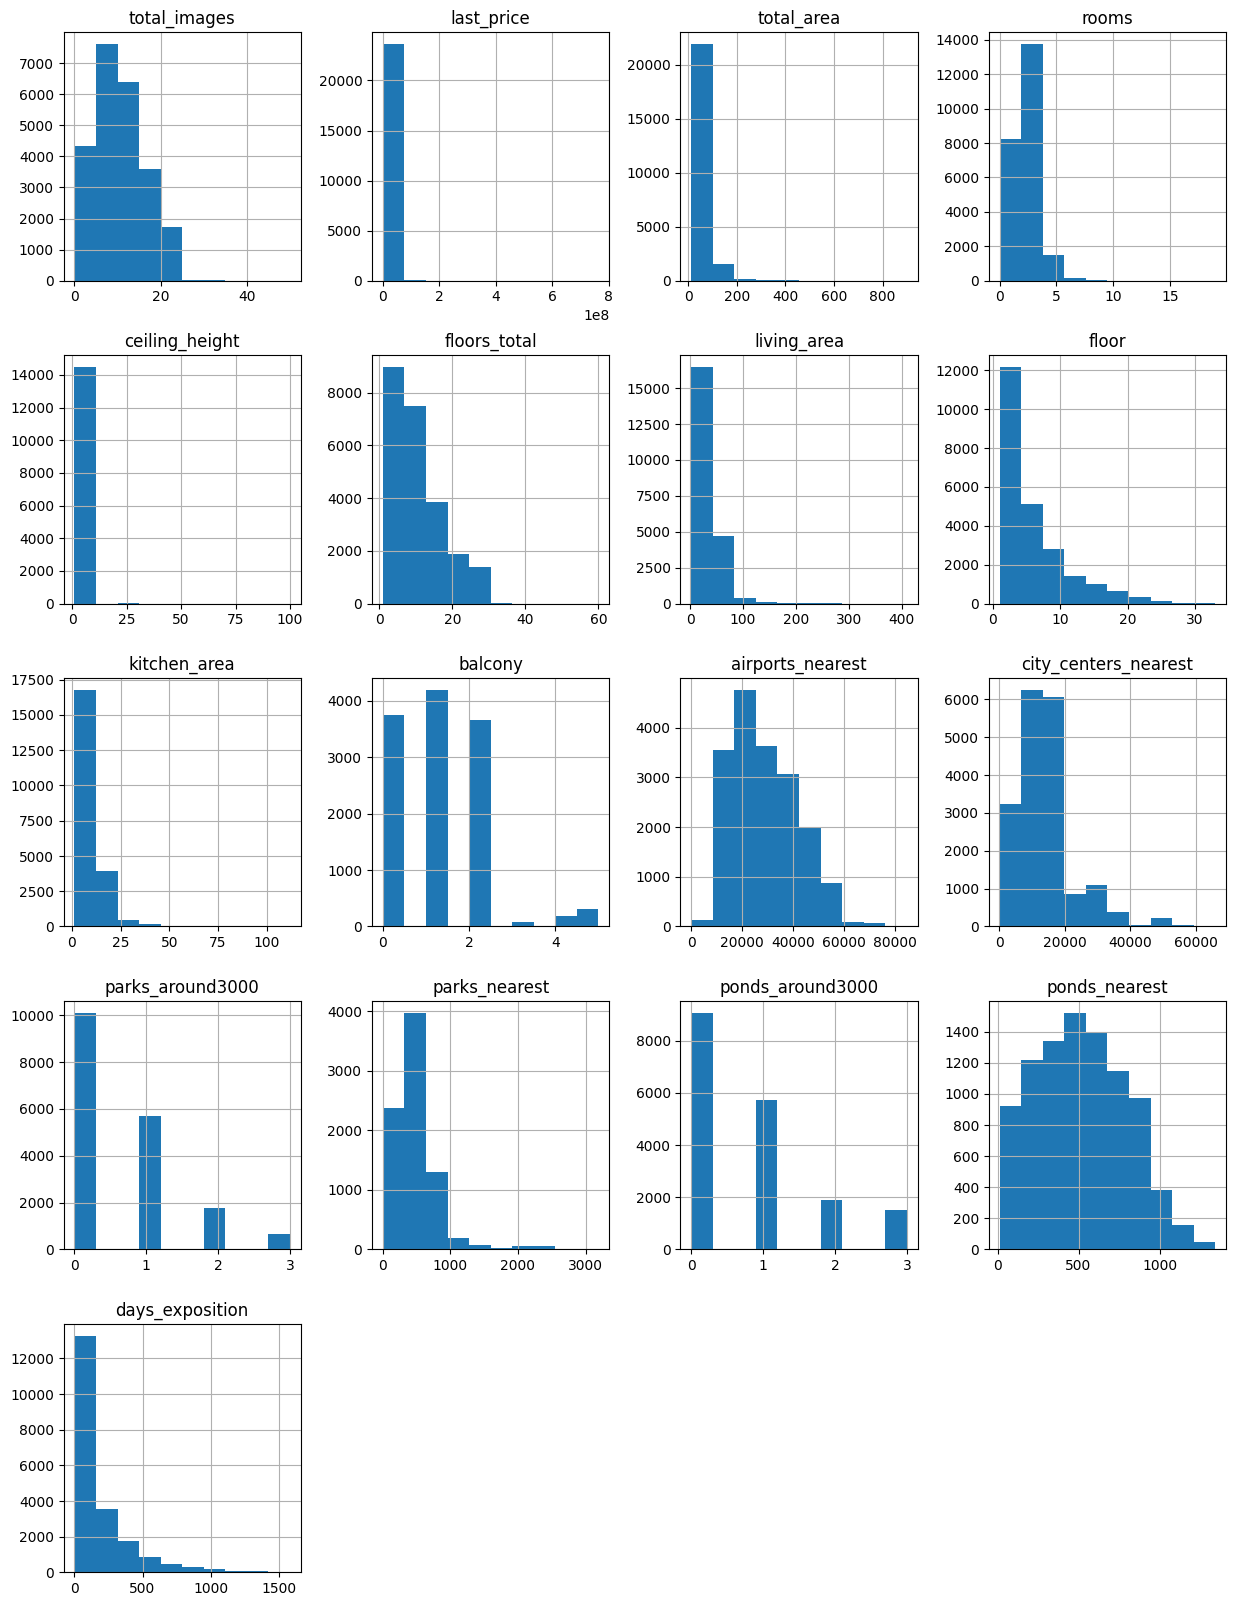

In [16]:
# построим общую гистограмму для всех столбцов датасета
data.hist(figsize = (15, 20))
plt.show()

**Выводы по семнадцати гистограммам**

Изучение гистограмм, построенных на данных до проведения их предобработки, показывает:

(1) в целом объявления о продаже содержат достаточное количество фотографий объекта недвижимости, однако, есть значительное количество объявлений без фотоиллюстраций

(2) гистограмма по ‘last_price’ не информативна в представленном разрешении, требует дальнейшего анализа в 3-й части

(3) общая площадь абсолютного большинства объектов недвижимости не превышает 100 кв. метров

(4) основное количество предлагаемых к продаже объектов недвижимости включает одну или две комнаты, немного меньше объявлений с тремя комнатами. Для 197 объявлений количество комнат указано равным нулю.

(5) гистограмма по ‘ceiling_height’ не информативна. Вероятно, для разных объявлений указана высота потолка в разных единицах измерения, что будет проверено на последующих этапах.

(6) основная часть предлагаемых объектов недвижимости находится в зданиях этажностью от 1 до 10.  Есть два объявления о продаже квартиры в 52-этажном и 60-этажном доме. Эти два объявления однозначно заполнены с ошибкой, т.к. самый высокий на сегодняшний день жилой дом в Санкт-Петербурге насчитывает только 37 этажей (жилой комплекс «Князь Александр Невский», пр. Обуховской обороны, 138 корп. 2 (https://spbhomes.ru/science/gde-najti-novuyu-kvartiru-s-erkerom-v-peterburge/)). Также вопросы есть к домам этажностью в 36 этажей (3 объявления) и 35 этажей (24 объявления), т.к. номером два по количеству этажей в Санкт-Петербурге является жилой комплекс «Петр Великий» (32 этажа). На момент формирования датасета в Санкт-Петербурге просто не могло быть домов с 35-ю и 36-ю этажами.

(7) жилая площадь предлагаемых объектов недвижимости в основном не превышает 50 квадратных метров.

(8) предлагаемые в объявлениях квартиры в основном находятся на этажах с 1 по 10.

(9) общая площадь кухонь у большинства квартир в объявлениях не превышает 10 квадратных метров

(10) количество балконов в объектах недвижимости колеблется преимущественно от нуля до двух, причем группы квартир по числу балконов ‘0’, ‘1’, ‘2’ примерно сопоставимы. Количество квартир с числом балконов ‘3’, ‘4’ или ‘5’ незначительно

(11) (12) на основе данных, не прошедших предобработку, можно сделать вывод, что большая часть квартир находится в 20 км от аэропорта «Пулково» и менее чем в 20 км от центра Санкт-Петербурга

(13) (14) подавляющее количество квартир находятся либо рядом с парком, либо в отдалении не более 1 км от парка. Четко просматривается соответствие данных на гистограммах ‘parks_around3000’ и ‘parks_nearest’.

(15) (16) Аналогичный предыдущему абзацу вывод можно сделать относительно водоемов. Санкт-Петербург и его окрестности богаты на реки, речки и озера. Безусловно, наличие Финского залива также вносит весомый вклад в улучшение обеспеченности объектов недвижимости близлежащими водоемами

(17) основная часть квартир находит своего нового хозяина менее чем за 200 дней



**ВЫВОДЫ ПО 1-Й ЧАСТИ (ШАГ 1)**

Проведен общий анализ датасета с архивом объявлений о продаже квартир в Санкт-Петербурге и близлежащих населенных пунктов за несколько лет.

Проведена первичная обработка данных, устранена проблема, препятствовавшая чтению данных (‘слипшиеся колонки’). Названия столбцов приведены к snake_case. Изучена общая информация о датасете, формат типов данных в столбцах. Выявлены явные недостатки в представлении данных, на которые необходимо будет обратить дополнительное внимание на этапе 2 «Предобработка данных».

Установлено отсутствие значительного количества данных в 5-ти столбцах из 22-х. Выделены три столбца, в которых пропущено от 8 до 23,4%.

На основе необработанных данных датасета построено 17 диаграмм, по каждой из которых приведено краткое заключение.

***Основной результат выполнения 1-й части***

В целом на первом этапе исследования критичных недостатков представления данных, которые могли бы свидетельствовать о невозможности решения поставленных задач, не выявлено. Запрашивать у разработчиков данные повторно не требуется.


### Предобработка данных

#### Поиск и изучение пропущенных значений в столбцах

In [17]:
# более подробно изучим пропущенные значения в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [18]:
# в столбце 'balcony' заполним пропущенные значения цифрой '0'
# т.к. отсуттсвие значений в этом столбце скорее всгео означает,
# что балкона в этой квартире нет
data['balcony'] = data['balcony'].fillna(0)

In [19]:
# отсутствующие в столбце 'is_apartment' значения вероятнее всего означают,
# что квартира не относится к типу 'апартаменты' (элитный сегмент жилья),
# поэтому заполним все пропуски значеинем 0
data['is_apartment'] = data['is_apartment'].fillna(0)

Отсутствующие в столбце 'ceiling_height' значения нельзя заполнить значением '0', т.к. высота потолка не может быть равна нулю. В связи с тем, что выборка значительна, предпочтительнее заполнить пропущенные значения медианным

In [20]:
# вычисляем медианное значение высоты потолка в объявления о недвижимости
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median

2.65

In [21]:
# заменяем пропущенные в столбце 'ceiling_height' значения на медианное
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [22]:
# пропущенные значения в столбце 'floors_total' заменим на медианное значение
floors_total_median = data['floors_total'].median()
floors_total_median

9.0

In [23]:
data['floors_total'] = data['floors_total'].fillna(floors_total_median)

In [24]:
# пропущенные значения в столбце 'living_area' заполним медианным значением
living_area_median = data['living_area'].median()
living_area_median

30.0

In [25]:
data['living_area'] = data['living_area'].fillna(living_area_median)

In [26]:
# пропущенные в столбце 'kitchen_area' значения заменим медианными
kitchen_area_median = data['kitchen_area'].median()
kitchen_area_median

9.1

In [27]:
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

В столбце 'locality_name' вопрос замены пустых значений не столь однозначен. В целом пропущенных значений в столбце не очень много (49), поэтому заменим пропущенные значения на 'Другие'

In [28]:
# пропущенные в столбце 'locality_name' значения заменяем на 'Другие'
data['locality_name'] = data['locality_name'].fillna('Другие')

Следующий на очереди на заполнение пробелов столбец 'days_exposition'. Заполнять его ни средним, ни медианным значением считаю нецелесообразным, т.к. это один из ключевых столбцов для анализа, и заполнение его определенными значениями может сильно исказить картину. Принято решение пропуски заменить на  'NaN' по двум причинам: (1) наличие пропусков может означать, что объявление на момент формирования датасета активно (квартира еще не продана), (2) исходный тип данных столбца float64

In [29]:
data['days_exposition'] = data['days_exposition'].fillna('NaN')

In [30]:
# Прежде чем продолжить заполнять пропущенные значения в строках столбцов,
# выведем промежуточный вариант информации о столбцах с пропусками
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Оставшиеся шесть столбцов с пропусками объединены географическим фактором. Из их числа столбцом, данные которого будут оказывать наибольшее влияние на достижение цели исследования, является 'city_centers_nearest'. Расстояние до аэропорта, наличие поблизости парков и водоемов в меньшей степени, но также  влияют на стоимость недвижимости. Два из шести столбцов входят в тройку столбцов датасета с самой большой долей пропусков. Это 'parks_nearest' (65,9% пропусков) и 'ponds_nearest' (61,6%). Однако данные в этих указанных столбцах в целом соотносимы с данными столбцов 'parks_around3000' и 'ponds_around3000', имеющими втрое меньшее количество пропусков (по 23,3% пропусков в каждом). В связи с этим принято решение удалить столбцы 'parks_nearest' и 'ponds_nearest'. В остальных четырех столбцах пропуски будут заменены на 'NaN'

In [31]:
data.drop('parks_nearest', inplace=True, axis=1)
data.drop('ponds_nearest', inplace=True, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,2.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,0,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,2.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,0,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,3.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,1.0,121.0


In [32]:
# дополнительная проверка по итогам удаления столбцов
data.shape

(23699, 20)

In [33]:
# в оставшихся четырех столбцах с пропусками
# заменяем пропущенные значения на 'NaN'
# в столбцах 'airport_nearest' и 'city_centers_nearest'
# в столбцах 'parks_around3000' и 'ponds_around3000'
# пропущенные значения заполним нулями (0), т.к. в этом случае
# пропуск может означать отсутствие парка и/или водоема в радиусе 3000 метров
data['airports_nearest'] = data['airports_nearest'].fillna('NaN')
data['city_centers_nearest'] = data['city_centers_nearest'].fillna('NaN')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [34]:
# проверяем наличие пропусков в столбцах
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
ponds_around3000        0
days_exposition         0
dtype: int64

#### Изменение типов данных в столбцах

После успешного удаления пропусков проверим типы данных в столбцах, в первую очередь двух столбцов, которые были отнесены к проблемным в первой части исследования.

In [35]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest         object
city_centers_nearest     object
parks_around3000        float64
ponds_around3000        float64
days_exposition          object
dtype: object

После дополнительного анализа становится ясно, что **изменить тип необходимо не в двух, а в семи столбцах**:

   - столбцы 'floors_total', 'balcony' включают тип данных float64. Очевидно, что в этих столбцах должны быть целые числа, самый правильный вариант просто перевести float64 в int64

   - тип данных в столбцах 'airport_nearest, 'city_centers_nearest',  необходимо из object перевести в float64

   - тип данных в столбцах 'parks_around3000', 'ponds_around3000' необходимо перевести из float64 в int64, т.к. в радиусе 3 км от квартиры не может быть половины парка или водоема (при этом тип данных в указанных столбцах не может быть булевым, т.к. парков и водоемов может быть более, чем 1)

   - тип данных в столбце 'first_day_exposition' необходимо перевести из object в datetime64

   - тип данных в столбце 'is_apartment' необходимо перевести из object в bool

   - тип данных object в 'days_exposition' заменим на float64

In [36]:
# переводим тип данных в столбцах 'floors_total' и 'balcony' из float64 в int64
data[['floors_total', 'balcony']] = \
data[['floors_total', 'balcony']].astype('int')

In [37]:
# переводим тип данных в столбцах 'airports_nearest',
# 'city_centers_nearest' из object в flot64
data['airports_nearest'] = \
pd.to_numeric(data['airports_nearest'], errors = 'coerce')
data['city_centers_nearest'] = \
pd.to_numeric(data['city_centers_nearest'], errors = 'coerce')

In [38]:
# переводим тип данных в столбцах 'parks_around3000' и 'ponds_around_3000'
# из float64 в int64
data[['parks_around3000', 'ponds_around3000']] = \
data[['parks_around3000', 'ponds_around3000']].astype('int')

In [39]:
# переводим тип данных в столбце 'first_day_exposition' из object в datetime64
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S'
)

Следующий на очереди изменения типа данных столбец 'is_apartment'. Ранее пропуски в этом столбце были заполнены нулями (0), т.к. отсутствие данных в столбце 'is_apartment' с высокой долей вероятности говорит о том, что тип этого жилья **не относится к апартаментам**.

In [40]:
# ранее в столбце 'is_apartment' все пропуски были заменены на нули
# чтобы привести все значения в столбце к булевым, меняем все нули на False
data.loc[data['is_apartment'] == 0, 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype(bool)

In [41]:
# проверяем уникальные значения столбца 'is_apartment' и тип данных столбца
# после изменений
data['is_apartment'].dtypes, data['is_apartment'].unique()

(dtype('bool'), array([False,  True]))

Тип данных в столбце 'days_exposition' в идеале было бы хорошо заменить с типа object на int64. Но т.к. ранее пропуски были заменены на пустую строку ' ', то даже заполнив пропущенные значения NaN-ми, мы не сможем float64 заменить на int64. Вероятно, приводить тип данных непременно к int64 не требуется. Посмотрим значения в первых 25-ти строках столбца days_exposition

In [42]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,2,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.00,9,False,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2,3,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,1,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,0,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,0,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.00,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,0,289.0


Для цели исследования допустимо изменить тип данных в столбце 'days_exposition' не на int64, а на flot64

In [43]:
# меняем тип данных в столбце 'days_exposition' с object на float64
data['days_exposition'] = \
pd.to_numeric(data['days_exposition'], errors = 'coerce')

In [44]:
# проверяем типы данных в столбцах после их изменения
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
ponds_around3000                 int64
days_exposition                float64
dtype: object

Во всех столбцах, которые были отобраны для изменения типов данных, типы данных успешно изменены.

#### Изучение уникальных значений в столбце 'locality_name'

In [45]:
# проверим наличие явных дубликатов в датасете
data.duplicated().sum()

0

Явных дубликатов в датасете нет. Следующим шагом станет проверка неявных дубликатов. В исследуемом датасете они могут быть представлены в столбце 'locality_name'

In [46]:
# изучим уникальные значения в столбце 'locality_name'
# вычислим количество уникальных значений до поиска и устранения неявных дубликатов
len(data['locality_name'].unique())

365

In [47]:
# выведем список уникальных значений столбца 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сгруппируем населенные пункты и подсчитаем количество населенных пунктов в каждой группе

In [48]:
data.groupby('locality_name')['locality_name'].count()

locality_name
Бокситогорск                                                  16
Волосово                                                      36
Волхов                                                       111
Всеволожск                                                   398
Выборг                                                       237
Высоцк                                                         4
Гатчина                                                      307
Другие                                                        49
Зеленогорск                                                   24
Ивангород                                                     28
Каменногорск                                                  13
Кингисепп                                                    104
Кириши                                                       125
Кировск                                                       84
Колпино                                                      338
Коммунар   

Неявные дубликаты скрываются не среди городов и более мелких населенных пунктов без указания их статуса, а среди городских поселков/посёлков, деревень и поселков/посёлков и т.д. Здесь высока вероятность того, что для одного и того же небольшого населенного пункта указывали разный статус. В случае с крупным городом сомнений в его статусе нет и даже указывать его не требуется, а вот какой статус у населенного пункта в сельской местности как правило население и риэлторы знают очень приблизительно. Выход видится в том, чтобы с помощью функции replace удалить статус у всех населенных пунктов. При использовании указанного подхода в рамках отдельно взятого субъекта Российской Федерации (в нашем случае это два субъекта РФ - город федерального значения Санкт-Петербург и Ленинградская область) ошибка будет столь незначительна, что ее можно не учитывать, - полные совпадения в рамках отдельно взятого субъекта РФ крайне редки. а если они произойдут, речь будет идти о считанном количестве объявлений из более чем 23000

In [49]:
data['locality_name'] = [x.replace('городской поселок ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('городской посёлок ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('деревня', 'поселок ') for x in data['locality_name']]
data['locality_name'] = [x.replace('коттеджный поселок ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('коттеджный посёлок ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('поселок городского типа ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('поселок станции', 'поселок ') for x in data['locality_name']]
data['locality_name'] = [x.replace('посёлок', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('посёлок городского типа ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('посёлок при железнодорожной станции ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('посёлок станции ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('садоводческое некоммерческое товарищество ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('садовое товарищество ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('село ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('поселок ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('городского типа ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('при железнодорожной станции ', '') for x in data['locality_name']]
data['locality_name'] = [x.replace('станции ', '') for x in data['locality_name']]

In [50]:
# проверим количество уникальных названий населенных пунктов
# после применения функции replace
len(data['locality_name'].unique())

348

Количество уникальных названий населенных пунктов благодаря применению единообразного статуса небольших населенных пунктов сократилось с 365 до 348. Проведем новую итерацию группировки значений столбца 'locality_name'

In [51]:
data.groupby('locality_name')['locality_name'].count()

locality_name
 Агалатово                      4
 Александровская                2
 Алексеевка                     1
 Аннино                        11
 Аро                            3
 Батово                         9
 Бегуницы                      17
 Белогорка                     11
 Белоостров                     1
 Большая Вруда                  4
 Большая Пустомержа             1
 Большие Колпаны               16
 Большое Рейзино                1
 Большой Сабск                  1
 Бор                            2
 Борисова Грива                 1
 Бугры                         69
 Ваганово                       3
 Важины                         6
 Вартемяги                     20
 Вахнова Кара                   1
 Вещево                         5
 Вознесенье                     2
 Возрождение                    2
 Войскорово                     5
 Вырица                        10
 Выскатка                       2
 Высокоключевой                 1
 Гаврилово                      4


Сгруппированный список разделен на две части: в верхней перед названием населенного пункта есть пробел, во второй части пробела нет. Удалим пробелы из названий. Несколько названий населенных пунктов склеятся - исправить их можно с помощью все той же функции replace, но ввиду того, что 'склеятся' названия небольших населенных пунктов, которые в суммарных выводах мы не увидим, эта работа не имеет смысла

In [52]:
data['locality_name'] = [x.replace(' ', '') for x in data['locality_name']]

In [53]:
len(data['locality_name'].unique())

306

In [54]:
# проведем третью итерацию группировки, чтобы проверить, можно ли еще
# выявить неявные дубликаты
data.groupby('locality_name')['locality_name'].count()

locality_name
Агалатово                    4
Александровская              2
Алексеевка                   1
Аннино                      16
Аро                          3
Барышево                     2
Батово                       9
Бегуницы                    17
Белогорка                   11
Белоостров                   1
Бокситогорск                16
БольшаяВруда                 4
БольшаяИжора                17
БольшаяПустомержа            1
БольшиеКолпаны              16
БольшоеРейзино               1
БольшойСабск                 1
Бор                          2
БорисоваГрива                1
Бугры                      114
Будогощь                     4
Ваганово                     3
Важины                       6
Вартемяги                   20
ВахноваКара                  1
Вещево                       5
Виллози                      3
Вознесенье                   2
Возрождение                  3
Войсковицы                  10
Войскорово                   5
Володарское              

Населенные пункты 'Сапёрное' (2 объявления) и 'Сапёрный' (6 объявлений) не являются дубликатами, относятся к разным географическим зонам Санкт-Петербурга/Ленобласти. К неявным дубликатам можно отнести населенные пункты 'Русско' (1 объявление) и 'Русско-Высоцкое' (9 объявлений). Т.к. населенного пункта 'Русско' не обнаружено, объединим эти населенные пункты под названием 'Русско-Высоцкое'

In [55]:
# в случае замены 'Русско' на 'Русско-Высоцкое' дубликат сразу удалить невозможно
# поэтому удаление этого дубликата будет проведено в два этапа
data['locality_name'] = [x.replace('Русско-Высоцкое', 'Русско') \
                         for x in data['locality_name']]
data['locality_name'] = [x.replace('Русско', 'Русско-Высоцкое') \
                         for x in data['locality_name']]

In [56]:
# проверяем количество уникальных названий после устранения неявных дубликатов
# в столбце 'locality_name'
len(data['locality_name'].unique())

305

В результате удаления неявных дубликатов количество уникальных названий населенных пунктов в столбце 'locality_name' сократилось с 365 до 305

#### Поиск и устранение редких и выбивающихся значений в столбцах

Изучим столбцы на наличие нетипичных значений. Анализ будет проведен не по всем оставшимся 20-ти столбцам, а по тем, которые в первую очередь будут влиять на достижение поставленной цели. Во внимание в первую очередь будут взяты минимальные и максимальные значения

In [57]:
data[['balcony', 'ceiling_height', 'city_centers_nearest', \
       'days_exposition', 'floor', 'floors_total', 'kitchen_area', \
       'last_price', 'living_area', 'total_area']].describe()

,balcony,ceiling_height,city_centers_nearest,days_exposition,floor,floors_total,kitchen_area,last_price,living_area,total_area
count,23699.000000,23699.000000,18180.000000,20518.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,0.591080,2.724358,14191.277833,180.888634,5.892358,10.667750,10.428526,6.541549e+06,34.099892,60.348651
std,0.959298,0.988298,8608.386210,219.727988,4.885249,6.585961,5.631126,1.088701e+07,21.162096,35.654083
min,0.000000,1.000000,181.000000,1.000000,1.000000,1.000000,1.300000,1.219000e+04,2.000000,12.000000
25%,0.000000,2.600000,9238.000000,45.000000,2.000000,5.000000,7.400000,3.400000e+06,19.000000,40.000000
50%,0.000000,2.650000,13098.500000,95.000000,4.000000,9.000000,9.100000,4.650000e+06,30.000000,52.000000
75%,1.000000,2.700000,16293.000000,232.000000,8.000000,16.000000,11.440000,6.800000e+06,41.100000,69.900000
max,5.000000,100.000000,65968.000000,1580.000000,33.000000,60.000000,112.000000,7.630000e+08,409.700000,900.000000


Необходимо проанализировать столбцы 'ceiling_height', 'floor', 'floors_total', 'living_area'. Выявлена жилая площадь 2 кв. метра. В столбце 'total_area' есть квартира/ы общей площадью 12 кв. метров (студии), но жилая площадь даже такой студии не может быть 2 кв. метра

In [58]:
# сделаем срез и проверим количество квартир, для которых указана
# жилая площадь менее 10 кв. м
data.query('living_area < 10').groupby('living_area')['living_area'].count()

living_area
2.0    2
3.0    2
5.0    1
5.4    1
6.0    1
6.5    1
8.0    2
8.3    1
8.4    1
8.5    1
8.9    1
9.0    9
9.1    1
9.8    1
Name: living_area, dtype: int64

Жилая площадь менее 6 кв. метров нереалистична даже для студий общей площадью 12 кв. метров. Количество таких редких нереалистичных значений 6, целесообразно их удалить

In [59]:
# с помощью фильтрации удаляем из датасета объявления, в которых жилая площадь
# меньше 6 кв. метров. Должно быть удалено 6 строк.
# В первой версии датасета было 23699 строк
data = data.query('living_area > 5.99')
data.shape

(23693, 20)

In [60]:
# проверим, остались ли в датасете объявления о квартирах
# с жилой площадью менее 6 кв. метров. Выведенный список должен быть пуст
data.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition


In [61]:
# ранее в отчете было отмечено, что два самых больших дома в Санкт-Петербурге
# имеют этажность в 32 и 37 этажей. Проверим, дома какой этажности
# выше 30-ти этажей есть в датасете
data.query('floors_total >30').groupby('floors_total')['floors_total'].count()

floors_total
33     1
34     1
35    24
36     3
37     1
52     1
60     1
Name: floors_total, dtype: int64

Что касается домов этажностью 37 и ниже, несмотря на подозрительные значения все же они могут с небольшой погрешностью соответствовать реальным, т.к. в высотных домах могут быть подземные этажи, и размещающие объявления организации или агенты по недвижимости могут вести отсчет от них, чтобы искусственно повысить этажность, предполагая, что это повысит ценность приобретения квартиры для потенциального покупателя. Посмотрим, что за квартиры продаются в домах с 52-мя и 60-тью этажами

In [62]:
# выведем информацию о квартирах, продающихся в домах с количетсвом этажей 52 и 60
data[data['floors_total'] == 52]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1,0,45.0


In [63]:
data[data['floors_total'] == 60]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,3,166.0


Обе квартиры не похожи на элитное жилье, которое предлагается в домах предельно высокой этажности. Впрочем, текущая ситуация на строительном рынке такова, что окраины Москвы и Санкт-Петербурга застраиваются по типу гетто, когда в доме с несколькими десятками этажей представлены к продаже в основном студии и малометражные однокомнатные квартиры. Если бы мы могли посмотреть фотографии объектов, вывод был бы сделан однозначный. Но с учетом имеющейся информации и понимания, что два объявления из 23693 на датасет не повлияют, заменим 52-й этаж на 5-й, а 60-й - на 6-й.

In [64]:
# изменяем значения аномальных этажей на приближенные к реальности
data.loc[data['floors_total'] == 52, 'floors_total'] = 5
data.loc[data['floors_total'] == 60, 'floors_total'] = 6

In [65]:
# проверим максимальную этажность дома после устранения аномальных значений
data['floors_total'].describe()

count    23693.000000
mean        10.662432
std          6.572220
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [66]:
# проверим количество строк и столбцов датасета
data.shape

(23693, 20)

In [67]:
# выведем информацию о столбце 'floor' сначала общую,
# затем группировку по этажам с расчетом количества квартир
data['floor'].describe()

count    23693.000000
mean         5.891403
std          4.884006
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [68]:
data.groupby('floor')['floor'].count()

floor
1     2916
2     3367
3     3073
4     2804
5     2621
6     1305
7     1218
8     1081
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     226
18     178
19     147
20     110
21     125
22     112
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

Значений, которые могут быть отнесены к аномальным, в столбце 'floor' не выявлено, он не требует корректировок. На очереди последний столбец для устранения аномальных значений - 'ceiling_height', в котором есть значения высоты потолка в 100 метров. Выявим все значения, превышающие высоту 3 метра, с помощью среза и группировки с подсчетом частоты встречаемости каждого значения высоты потолка

In [69]:
data.query('ceiling_height > 3').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
3.01        6
3.02        8
3.03        4
3.04        6
3.05       46
3.06       11
3.07       11
3.08       14
3.09        4
3.10      203
3.11        7
3.12       17
3.13       11
3.14        7
3.15       57
3.16        7
3.17        5
3.18       11
3.20      277
3.21        3
3.22        3
3.23        4
3.24        4
3.25       36
3.26        6
3.27        6
3.28        6
3.29        1
3.30      141
3.31        3
3.32        6
3.33       10
3.34        3
3.35       16
3.36        5
3.37        4
3.38        8
3.39        1
3.40       92
3.42        1
3.43        1
3.44        1
3.45        9
3.46        4
3.47        6
3.48        1
3.49        2
3.50      130
3.51        2
3.52        3
3.53        3
3.54        6
3.55       18
3.56        5
3.57        3
3.58        1
3.59        1
3.60       36
3.62        2
3.63        3
3.65        4
3.66        3
3.67        3
3.68        1
3.69        1
3.70       30
3.75        8
3.76        1
3.78        3
3.80       20
3.82 

В Санкт-Петербурге и пригородах к продаже может предлагаться много объектов недвижимости в старых еще дореволюционных домах с очень высокими потолками. Повышенная высота потолков может предлагаться в элитных квартирах. Но разумные границы должны быть. Примем за эту разумную границу высоту потолка в 3,5 метра. С помощью среза вычислим среднее и медианное значение высоты потолка среди объявлений с высотой потолка до 3,5 метров и решим, каким именно значением заполнить информацию о высоте потолка в объявлениях с подозрительно высоким значением. Чтобы оценить произошедшие изменения рассчитаем среднюю и медианную высоту потолка до обработки и после

In [70]:
# вычислим среднее и медианное значение высоты потолка до обработки значений
print('Средняя высота потолка до обработки значений:', \
      data['ceiling_height'].mean())
print('Медианная высота потолка до обработки значений:', \
      data['ceiling_height'].median())

Средняя высота потолка до обработки значений: 2.7243540286160473
Медианная высота потолка до обработки значений: 2.65


Для больших выборок предпочтительнее заполнять пропущенные значения медианным, а не средним. На этапе предобработки данных пропуски были заполнены именно медианным значением 2,65 м. Оно не изменилось после заполнения пропусков. Однако сейчас речь не о заполнении пропусков, а о корректировке аномальных значений. Поскольку с большей долей вероятности высота потолка у 'аномальных' объявлений может отличаться в большую сторону от медианного, все значения выше 3,5 метров заменим на 2,8 метра.
В датасете минимальная высота потолка начинается с 1 м. Все значения от 1 м. до 1,8 м. будем считать ошибочными,  и, в случае, если высота потолка находится в диапазоне от 1 до 1,8 м., заменим ее на 1,8 м.

In [71]:
# для того, чтобы заменить значение высоты потолка во всех ячейках,
# где оно (1) превышает 3,5 м, (2) принимает значения
# менее чем 1,8 м - создадим функцию
# и применим ее к столбцу 'ceiling_height', 'перезаписав' его
def ceiling_normalize(row):
    if row > 3.5:
        return 2.8
    if row < 1.8:
        return 1.8
    if 1.8 <= row <= 3.5:
        return row

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_normalize)

In [72]:
# вычислим среднее и медианное значение высоты потолка
# после обработки значений
print('Средняя высота потолка после обработки значений:', \
      data['ceiling_height'].mean())
print('Медианная высота потолка после обработки значений:', \
      data['ceiling_height'].median())

Средняя высота потолка после обработки значений: 2.684443506520913
Медианная высота потолка после обработки значений: 2.65


Медианная высота потолков в объявлениях не изменилась, а средняя немного уменьшилась - это было ожидаемо, т.к. значения, превышающие 3,5 метра, были скорректированы в сторону уменьшения. Но так как их количество в общем объеме объявлений было невелико - средняя высота потолка уменьшилась на 4 см (с 2,72 м до 2,68 м.)

In [73]:
# проверим общуюу статистику столбца 'ceiling_height'
data['ceiling_height'].describe()

count    23693.000000
mean         2.684444
std          0.176010
min          1.800000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

In [74]:
# проверим общее состояние датасета
data.shape

(23693, 20)

In [75]:
# проверим первые пять строк датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,2,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,3,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,1,121.0


Корректировка значений в столбце 'ceiling_height' выполнена успешно

По итогам выполнения **второй части исследования**:
- была проведена детальная работа с пропусками: в некоторых столбцах пропуски были заполнены медианными значениями. В столбцах с исходным типом данных float64 для заполнения пропусков был выбран NaN
- типы данных в столбцах были изменены там, где тип данных не соответствовал логике этих данных и мог помешать дальнейшему анализу
- установлено, что явных дубликатов в датасете нет. Среди столбцов датасета неявные дубликаты могли быть только в столбце 'localiry_name'. И они там были выявлены и удалены, в результате трехэтапного удаления неявных дубликатов количество уникальных названий населенных пунктов сократилось с 365 до 305
- выявлены и удалены или обработаны аномальные/случайные значения в столбцах 'ceiling_height', 'floors_total', 'total_area'

**Данные датасета подготовлены для проведения основных этапов исследования**

### Посчитайте и добавьте в таблицу новые столбцы

In [76]:
# создадим в data столбец с ценой одного кв. метра 'price_per_meter'
data['price_per_meter'] = data['last_price'] / data['total_area']

In [77]:
# уменьшим количество знаков после запятой в столбце 'price_per_meter'
data['price_per_meter'] = data['price_per_meter'].astype(np.int64)

In [78]:
# проверяем столбец 'price_per_meter' и округление значений
data[['last_price', 'total_area', 'price_per_meter']].head(7)

,last_price,total_area,price_per_meter
0,13000000.0,108.0,120370
1,3350000.0,40.4,82920
2,5196000.0,56.0,92785
3,64900000.0,159.0,408176
4,10000000.0,100.0,100000
5,2890000.0,30.4,95065
6,3700000.0,37.3,99195


In [79]:
# создадим в data столбец со днем публикации объявления
# о продаже квартиры 'week_day'
data['week_day'] = data['first_day_exposition'].dt.dayofweek

In [80]:
# проверим значения в столбце 'week_day' в последних 10-ти строчках
data[['first_day_exposition', 'week_day']].tail(10)

,first_day_exposition,week_day
23689,2018-02-28,2
23690,2018-07-19,3
23691,2016-10-13,3
23692,2017-07-07,4
23693,2016-08-05,4
23694,2017-03-21,1
23695,2018-01-15,0
23696,2018-02-11,6
23697,2017-03-28,1
23698,2017-07-21,4


In [81]:
# создадим в data столбец с месяцем публикации
# объявления о продаже квартиры 'month_publication'
data['month_publication'] = data['first_day_exposition'].dt.month

In [82]:
# проверим значения в столбце 'month_publication' в последних 10-ти строчках
data[['first_day_exposition', 'month_publication']].tail(10)

,first_day_exposition,month_publication
23689,2018-02-28,2
23690,2018-07-19,7
23691,2016-10-13,10
23692,2017-07-07,7
23693,2016-08-05,8
23694,2017-03-21,3
23695,2018-01-15,1
23696,2018-02-11,2
23697,2017-03-28,3
23698,2017-07-21,7


In [83]:
# создадим в data столбец с годом публикации
# объявления о продаже квартиры 'year_publication'
data['year_publication'] = data['first_day_exposition'].dt.year

In [84]:
# проверим значения в столбце 'year_publication' в 10-ти отобранных нугад строчках
data[['first_day_exposition', 'year_publication']].sample(10)

,first_day_exposition,year_publication
13131,2017-10-13,2017
6163,2018-07-16,2018
19199,2018-02-09,2018
2729,2016-04-28,2016
19949,2017-04-27,2017
14649,2018-07-08,2018
517,2019-01-08,2019
14722,2019-02-25,2019
17796,2018-11-26,2018
18594,2017-12-21,2017


In [85]:
# для создания столбца, включающего тип этажа квартиры
# ('первый', 'последний', 'другой') используем функцию и применим ее к датасету
def type_of_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(type_of_floor, axis = 1)

In [86]:
# проверим значения в столбце 'floor_type' в 15-ти отобранных нугад строчках
data[['floor', 'floors_total', 'floor_type']].sample(10)

,floor,floors_total,floor_type
2978,2,12,другой
4437,9,9,последний
20876,22,28,другой
22316,12,13,другой
1037,6,9,другой
22540,3,4,другой
8714,3,3,последний
9410,1,9,первый
11978,8,10,другой
13549,2,9,другой


In [87]:
# создадим в data столбец с данными о расстоянии до центра в км 'distance_to_center'
data['distance_to_center'] = (data['city_centers_nearest']/1000)

In [88]:
# округлим до целых значения в столбце 'distance_to_center'
data['distance_to_center'] = data['distance_to_center'].round().astype('Int64')

In [89]:
# проверим значения в столбце 'distance_to_center' в 10-ти отобранных наугад строчках
data[['city_centers_nearest', 'distance_to_center']].sample(10)

,city_centers_nearest,distance_to_center
16054,18498.0,18
198,NaN,<NA>
243,NaN,<NA>
16240,NaN,<NA>
9842,10667.0,11
16308,11417.0,11
20128,9009.0,9
21687,17417.0,17
19144,NaN,<NA>
8528,NaN,<NA>


In [90]:
# проверим первые пять строк датасета после добавления столбцов и округления
# до целых значений показателей в столбцах
# 'price_per_meter' и 'distance_to_center'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_meter,week_day,month_publication,year_publication,floor_type,distance_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,0,81.0,82920,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,2,558.0,92785,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,3,424.0,408176,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,1,121.0,100000,1,6,2018,другой,8


По итогам выполнения **третьей части исследования** в датасет были добавлены новые столбцы:

- столбец с ценой одного кв. метра 'price_per_meter' (показатели округлены до целых значений)

- столбец со днем публикации объявления об объекте недвижимости 'week_day'

- столбец с месяцем публикации объявления об объекте недвижимости 'month_publication'

- столбец с годом публикации объявления об объекте недвижимости 'year_publication'

- столбец с указанием типа этажа квартиры (‘первый’, ’последний’, ’другой’)

- столбец с данными о расстоянии до центра в км 'distance_to_center' (показатели округлены до целочисленных значений)


### Проведите исследовательский анализ данных

#### Исследование отдельных параметров объектов недвижимости

В рамках первой части 4-го раздела исследования по 13 параметрам объявлений о недвижимости будут построены гистограммы

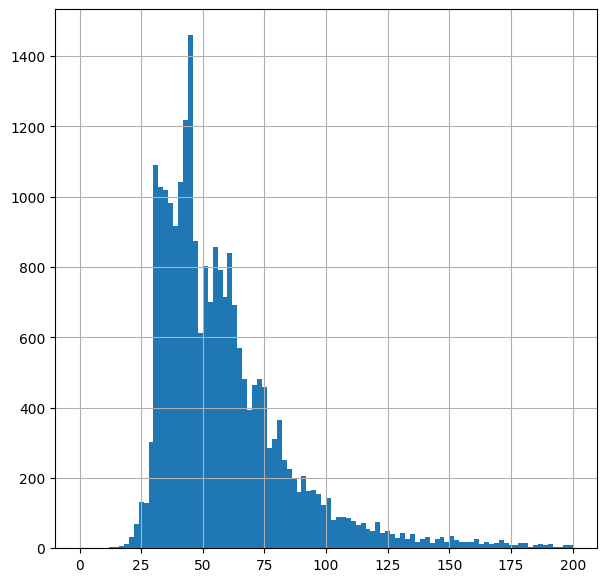

In [91]:
# строим гистограмму по общей площади квартир
data['total_area'].hist(bins = 100, figsize = (7, 7), range = (0, 200))
plt.show()

Количество квадратных метров предлагаемых к продаже квартир  в основном не превышает 75 кв. метров. Почти половина всего жилья - это квартиры с площадью до 50 кв. метров (студии, малометражные 1-но и 2-х комнатные квартиры). Квартиры метражом более 150 кв. метров немногочисленны. Максимальный заявленный метраж составляет 900 кв. метров, но т.к. значения более 200 кв. метров практически сливаются с осью абсцисс, отображаемые границы были ограничены значениями от 0 до 200 кв. метров

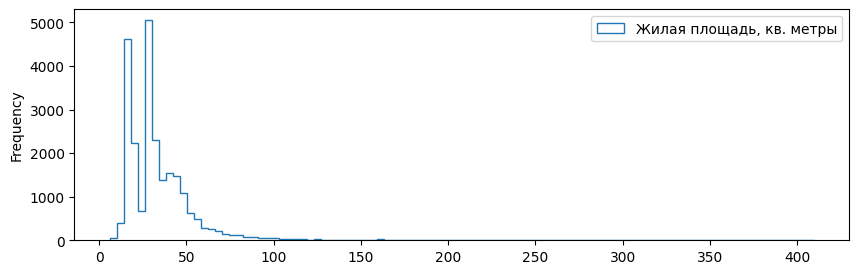

In [92]:
# строим гистограмму по жилой площади квартир
data['living_area'].plot(kind = 'hist', histtype = 'step', \
                         linewidth=1, bins = 100, \
                         label = 'Жилая площадь, кв. метры', \
                         legend = True, figsize = (10, 3))
plt.show()

Жилая площадь в большинстве случаев ограничена 35-ю квадратными метрами. В более ограниченном варианте предоставлены квартиры площадью жилых помещений от 35 до 50 кв. метров. Предложение квартир с жилой площадью более 100 кв. метров невелико (на графике после отметки в 100 кв. метров линия гистогарммы практически сливается с осью абсцисс)

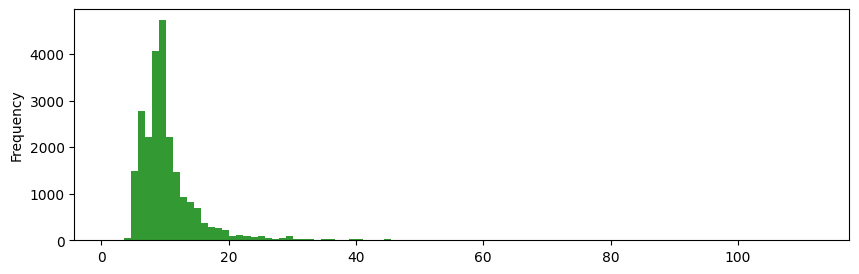

In [93]:
# строим гистограмму по общей площади кухни
data['kitchen_area'].plot(kind = 'hist', linewidth = 3, \
                         bins = 100, label = 'Площадь кухни, кв. метров', \
                         legend = False, figsize = (10, 3), alpha = 0.8,
                         color = 'green')
plt.show()

В размещенных объявлениях наиболее часто встречаются кухни площадью 10-13 кв. метров. Есть небольшое количество вариантов с совсем крошечными кухнями. Скорее всего это варианты в старых экспериментальных домах, построенных в 1920-1940-х гг., когда проводились архитектурные эксперименты. В частности, одно из направлений домостроительства утверждало идею о ненужности кухонь вообще - люди должны были питаться исключительно в общественных столовых, которые возводили в шаговой доступности от строящегося здания. В годы пятилеток в Новокузнецке был построен целый квартал пятиэтажных домов, площадь квартир в которых была равна 9 кв. метрам (из которых условные 3 кв. метра - кухня). В данном исследовании мы изучаем отнюдь не Новокузнецк, но пример Новокузнецка может объяснить факт наличия кухонь площадью менее 4 кв. метров. Квартиры со сверхбольшими кухнями скорее всего относятся либо к элитному жилью с повышенной общей площадью, либо к перепланированным квартирам, когда за счет сноса ненесущей стены кухня и прилегающая комната объединяются в кухню-гостиную

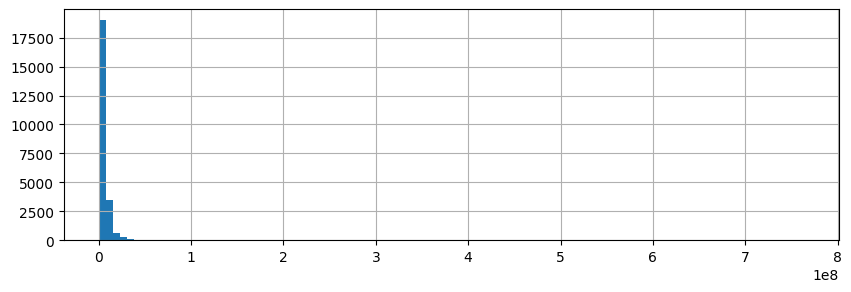

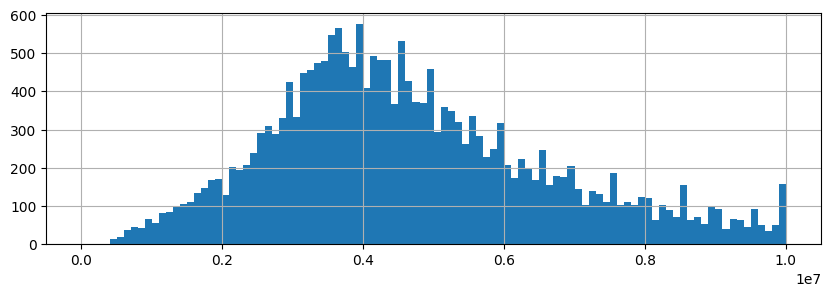

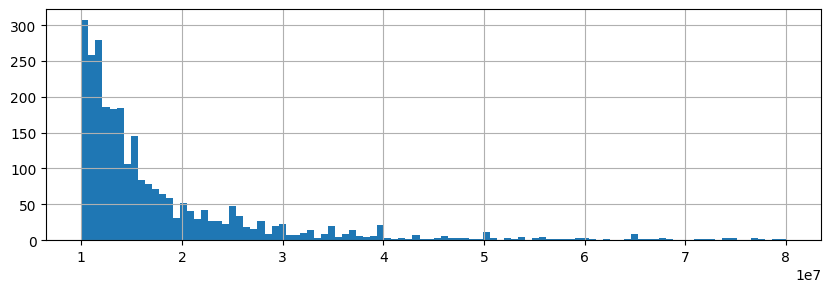

In [94]:
# строим гистограмму по цене объекта
data['last_price'].hist(bins = 100, figsize = (10, 3))
plt.show()
# вторую гистограмму по цене объекта строим для квартир стоимостью
# от 0 до 10 млн. рублей
data['last_price'].hist(bins = 100, figsize = (10, 3), range = (0, 10000000))
plt.show()
# третью гистограмму строим для квартир стоимостью
# от 10 до 76 млн. рублей
data['last_price'].hist(bins = 100, figsize = (10, 3), \
                       range = (10000000, 80000000))
plt.show()

Максимальная стоимость квартиры составляет 76 млн. рублей. Сегмент сверхдорогого жилья представлен далеко не единичными предложениями. Широкое предложения квартир стоимостью от 8 до 20 млн. рублей говорит о наличии платежеспособного спроса и высокого уровня жизни в Санкт-Петербурге. Стоимость основного количества предлагаемых квартир находится в пределах от 4 до 6 млн. Можно предположить, что преимущественно это города Ленинградской области и окраины Санкт-Петербурга. Сейчас эта гипотеза дополнительно проверяться не будет, т.к она запланирована и будет проверена позднее в отдельном пункте исследовательской программы

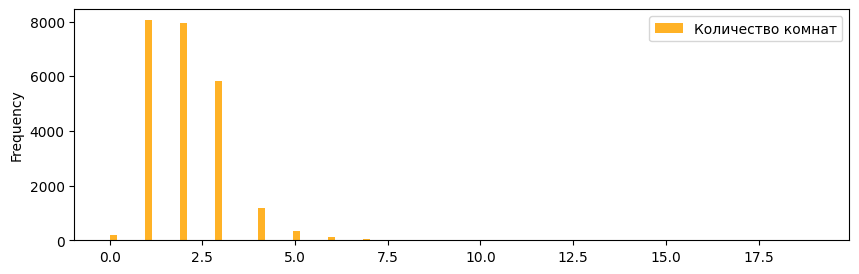

In [95]:
# строим гистограмму по количеству комнат
data['rooms'].plot(kind = 'hist', bins = 100, label = 'Количество комнат', \
                  figsize = (10, 3), color = 'orange', grid = False, \
                  legend = True, alpha = 0.85)
plt.show()

Самые массовые варианты из предлагаемых объектов недвижимости включают 1-но, 2-х или 3-х комнатные квартиры. Гистограмма дала дополнительный неожиданный результат - на ней просматриваются квартиры с отсутствием комнат. Это очевидная ошибка, по всей видимости, количество комнат просто не было указано. Все нулевые значения для указания количества комнат заполним значением '1'

In [96]:
def room_correct_number(row):
    """
    с помощью функции заполним значением '1' количество комнат в объявлениях
    с нулевым показателем
    """
    if row == 0:
        return 1
    if row > 0:
        return row

data['rooms'] = data['rooms'].apply(room_correct_number)

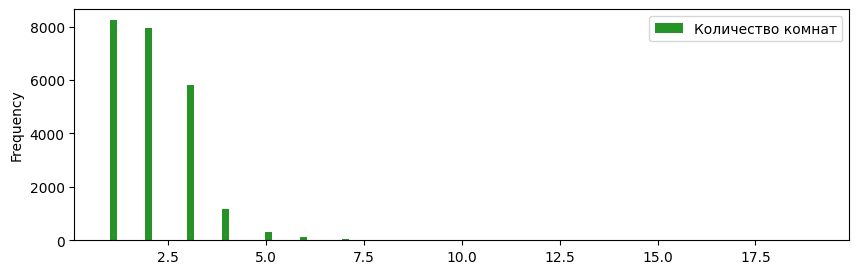

In [97]:
# повторно строим гистограмму по количеству комнат, цвет заменим на зеленый
data['rooms'].plot(kind = 'hist', bins = 100, label = 'Количество комнат', \
                  figsize = (10, 3), color = 'green', grid = False, \
                  legend = True, alpha = 0.85)
plt.show()

Квартир с нулевым количеством комнат больше нет. Однокомнатных квартир стало немного больше, но порядок не изменимся: больше всего в объявлениях 1-но комнатных квартир, на втором месте 2-х комнатные, на третьем месте - 3-х комнатные

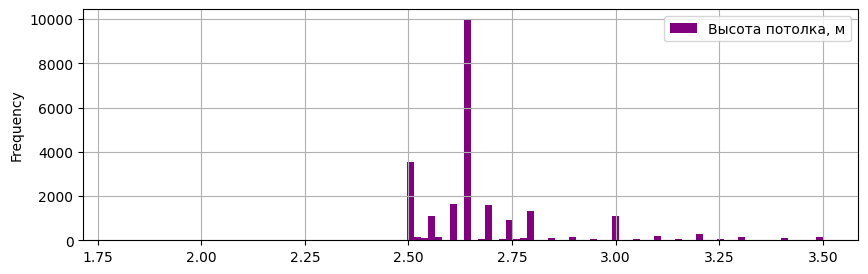

In [98]:
# строим гистограмму по высоте потолков
data['ceiling_height'].plot(kind = 'hist', legend = True, \
                        bins = 100, label = 'Высота потолка, м', \
                        figsize = (10, 3), color = 'purple', grid = True)
plt.show()

Самая распространенная высота потолка - 2,65 м. Минимальный стандарт, широко распространившийся в годы советского массового строительства. На гистограмме выделяются квартиры с высотой потолка в 3 м - преимущественно это дома повышенной комфортности, построенные в 1930-1950-хх гг., и современные дома среднего и элитного сегмента

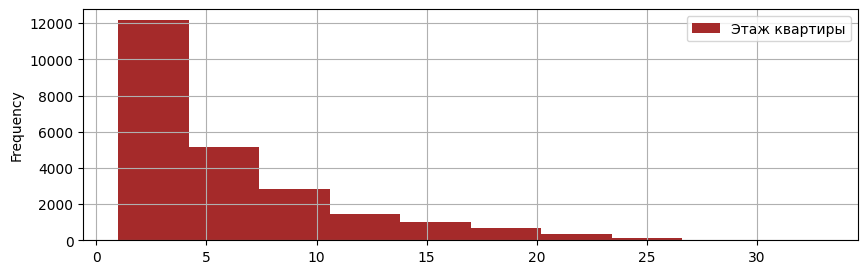

In [99]:
# строим гистограмму для визуализации этажей, на которых расположены
# продаваемые квартиры
data['floor'].plot(kind = 'hist', \
                  label = 'Этаж квартиры', legend = True, \
                  figsize = (10, 3), grid = True, color = 'brown')
plt.show()

Около 55% предлагаемых к продаже квартир находятся на этажах с 1-го по 4-й. Около 35% - на этажах с 5-го по 10-й. Предложение квартир на этажах выше 10-го также не ограничивается одиночными вариантами. Санкт-Петербург и ближайшие пригороды активно застраиваются высотными домами. Жилые дома с количеством этажей от 25-ти входят в моду, но это искусственно навязанная мода. Например, известны случаи, когда отключалось электроснабжение лифтов, и владельцы квартир, например, на 28-м этаже, совершенно иначе взглянули на свою высоко расположенную квартиру. Застройщикам выгодно строить стремящиеся вверх "скворечники". США прошли печально известный опыт создания гетто. Москва и Санкт-Петербург идут точно по этому же пути, повышая этажность жилых домов на окраинах.

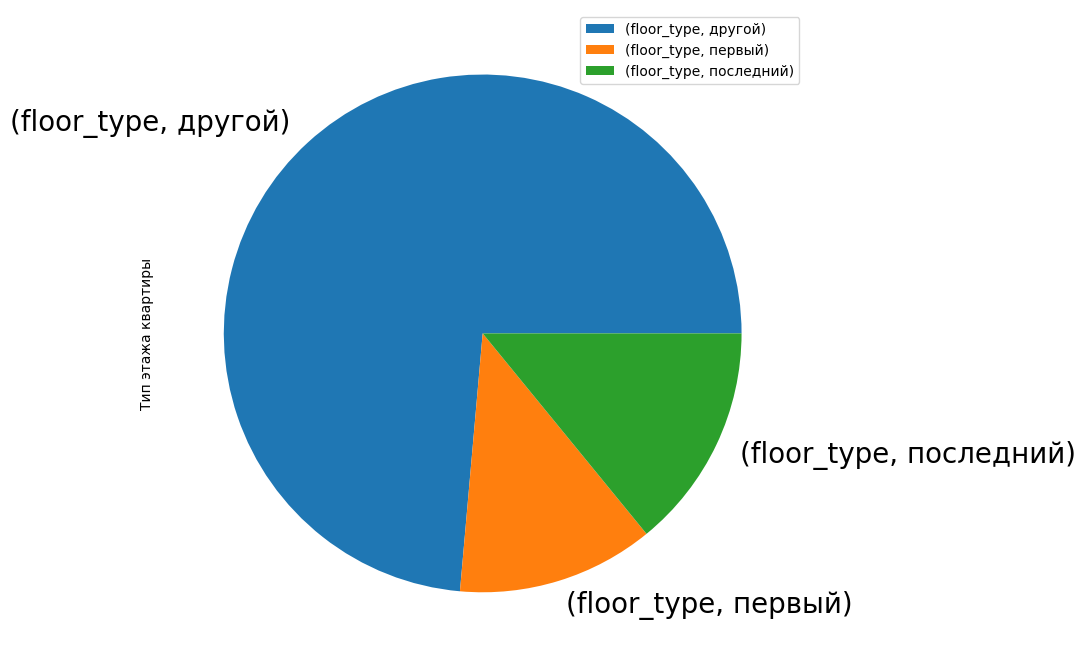

In [100]:
# строим  гистограмму для визуализации типов этажей квартиры
# с параметром 'kind' = 'pie'
data.groupby(['floor_type']).agg({'floor_type':'count'}).unstack() \
                        .plot(kind = 'pie', legend = True, \
                        label = 'Тип этажа квартиры', figsize = (10, 9), \
                        fontsize = 20)
plt.tight_layout()

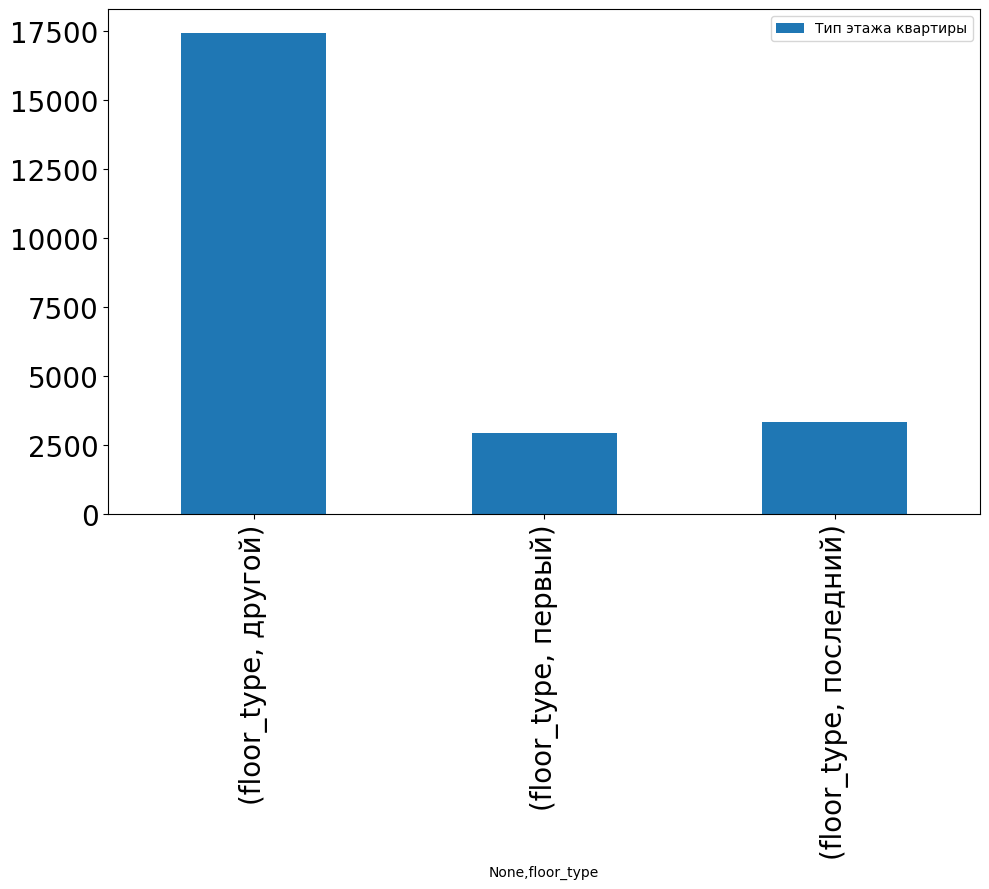

In [101]:
# строим  гистограмму для визуализации типов этажей квартиры
# с параметром 'kind' = 'bar'
data.groupby(['floor_type']).agg({'floor_type':'count'}).unstack() \
                        .plot(kind = 'bar', legend = True, \
                        label = 'Тип этажа квартиры', figsize = (10, 9), \
                        fontsize = 20)
plt.tight_layout()

Первый и последний этажи в целом соотносятся по количеству. Ожидаемо основная часть представлена квартирами, находящиеся между первым и последним этажом. Все такие квартиры в ходе предобработки данных были отнесены к категории 'другие'

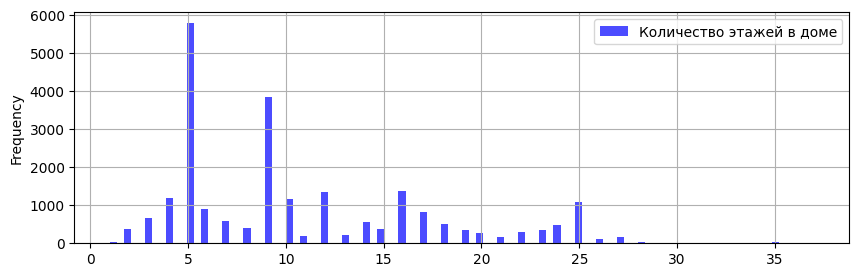

In [102]:
# строим гистограмму для отображения общего количества этажей в домах,
# в которых предлагаются к продаже квартиры
data['floors_total'].plot(kind = 'hist', label = 'Количество этажей в доме', \
                         figsize = (10, 3), grid = True, color = 'blue',
                         alpha = 0.7, legend = True, bins = 100)
plt.show()

Самыми многочисленными являются квартиры в 5-ти этажных домах- это не только 'отголосок' застройки территории страны в 1960-1970-х гг. массовыми дешевыми 'хрущевками'. Согласно строительным нормам дом с числом этажей 6 и более должен быть оснащен лифтом, который удорожает строительство, если число этажей будет всего на 1-3 выше 5. Поэтому строители возводят либо 5-этажные дома, если цена земли относительно недорогая и есть необходимые коммуникации. В остальных случаях возводится дом максимально возможной этажности. Кроме 5-ти этажных особо выделяются 9-ти и 10-ти этажные дома (скорее всего это типовые панельные многоэтажки, массово построенные в 1980-1990-х гг, 'брежневки' и близкие к ним проекты). Также отметим большое количество 16-ти, 17-ти и особенно 25-ти этажных домов - -это определенно дома относительно новые, массово возводимые по принципу 'гетто' (близко расположенные высотки с минимальной обеспеченностью парковыми и открытыми площадями вокруг, преимущественно включающие квартиры-студии и малометражные квартиры, находящиеся на периферии мегаполисов) и собственно элитные высотные дома

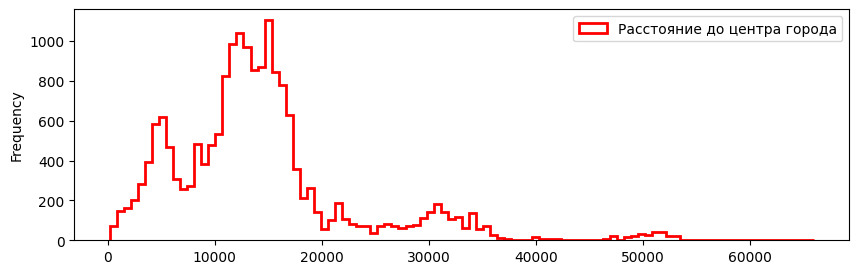

In [103]:
# строим гистограмму, отображающую расстояние до центра города в метрах
data['city_centers_nearest'].plot(kind = 'hist', histtype = 'step', \
                         linewidth=2, bins = 100, color = 'red', \
                         label = 'Расстояние до центра города', \
                         legend = True, figsize = (10, 3))
plt.show()

Пояснительная информация к датасету не содержала информации о том, показатели расстояния до центра какого именно города в ней представлены. Полученная гистограмма позволяет сделать однозначный вывод: столбец 'city_centers_nearest' включает информацию о расстоянии от продаваемой квартиры до центра Санкт-Петербурга. Основная часть квартир из объявлений о продаже находится на расстоянии от 10 до 18 км

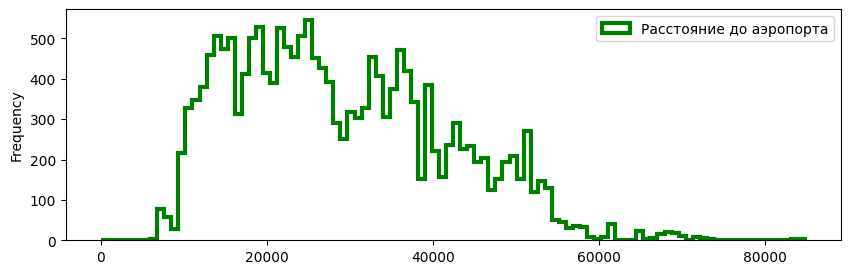

In [104]:
# строим гистограмму, отражаюющую расстояние до ближайшего аэропорта
data['airports_nearest'].plot(kind = 'hist', histtype = 'step', \
                         linewidth=3, bins = 100, color = 'green', \
                         label = 'Расстояние до аэропорта', \
                         legend = True, figsize = (10, 3))
plt.show()

Небольшое количество предлагаемых к продаже квартир находится на расстоянии 5-10 км. от аэропорта. В целом удаленность от аэропорта можно обозначить как значительную. Учитывая широкую (в масштабах Ленинградской области) географию предлагаемых к продаже квартир, этот результат закономерен

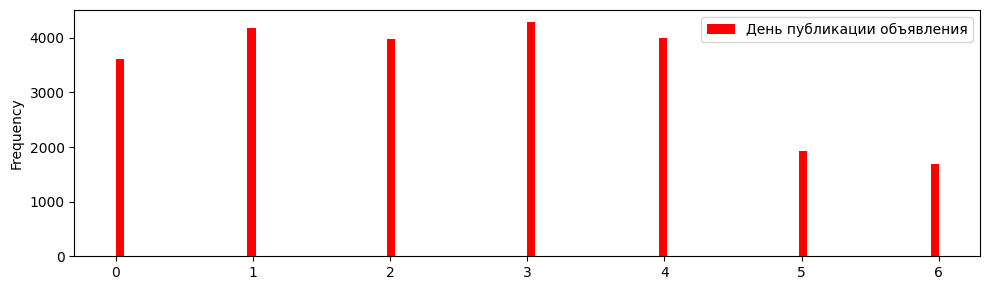

In [105]:
# строим гистограмму, отображающую день публикации объявления
data['week_day'].plot(kind = 'hist', bins = 100, color = 'red', \
                     label = 'День публикации объявления', legend = True,
                     figsize = (10, 3))
plt.tight_layout()

Рекламные объявления о продаже объектов недвижимости примерно с одинаковой частотой размещаются в будние дни (в понедельник чуть меньше; во вторник, среду, четверг и пятницу размещается примерно одинаковое количество объявлений). С небольшим отрывом по количеству размещаемых в течении недели объявлений является четверг. Риэлторские агентства работают без выходных, и звонить риэлтору можно 24*7, но, на выходные дни риэлторы оставляют только ту работу, которую нельзя перенести на будний день. В субботу и воскресенье размещается в два раза меньше объявлений, чем в будние дни. По выходным объявления чаще размещают продавцы квартир, которые выставляют их на продажу самостоятельно. Для этой категории рекламодателей объявлений о продаже квартир наиболее удобными являются выходные дни. Но т.к. количество объявлений, выставляемых риелторами, закономерно больше числа объявлений от физических лиц, показатели субботы и воскресенья существенно уступают любому из будних дней

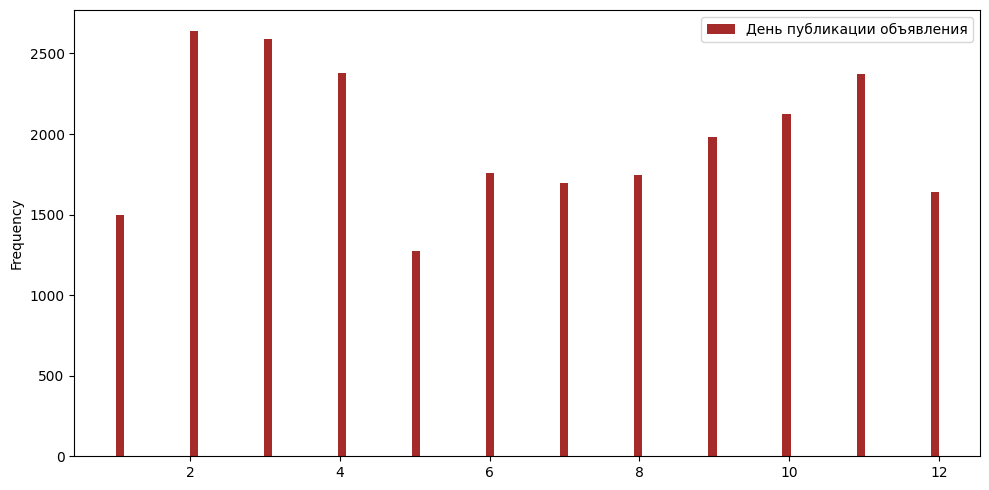

In [106]:
# строим гистограмму, отображающую месяц публикации объявления
data['month_publication'].plot(kind = 'hist', bins = 100, color = 'brown', \
                     label = 'День публикации объявления', legend = True,
                     figsize = (10, 5))
plt.tight_layout()

Наиболее активно объявления о продаже недвижимости выставляются в феврале, марте и апреле. К маю все, кто хотел выставить объявления весной, в основном их размещают. В летние месяцы количество новых объявлений немного увеличивается, превышает майское значение, но не достигает показателей с февраля по апрель. В осенний период количество объявлений стабильно нарастает, достигая пика в ноябре, - после летних отпусков владельцы квартир находят время, чтобы заняться продажей своего объекта недвижимости и поиском нового. В декабре количество объявлений существенно ниже в сравнении с ноябрем. Здесь основную роль играет подготовка к Новому году, понимание. что в январе две недели все учреждения будут закрыты. По этой же причине январь не отличается большим количеством поданных объявлений. И только после того, как долгие новогодние праздники завершаются, владельцы квартир возвращаются к вопросу выставления на продажу своей квартиры. Начинается весенний трехмесячный цикл повышенного количества выставляемых объявлений

#### Изучение скорости продажи квартир

In [107]:
# посчитаем среднее и медианное количество дней продажи квартиры
print('Среднее количество дней продажи квартиры', \
      data['days_exposition'].mean().round(0))
print('Медианное количество дней продажи квартир', \
     data['days_exposition'].median().round(0))

Среднее количество дней продажи квартиры 181.0
Медианное количество дней продажи квартир 95.0


Очевидно, что есть квартиры, которые очень долго продаются - они и являются причиной того, что среднее количество дней продажи квартир почти в два раза превышает медианное

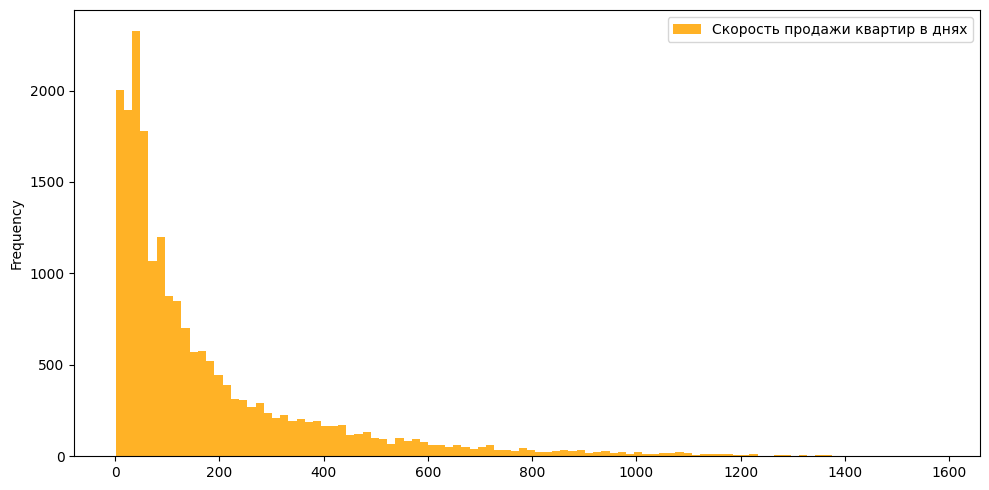

In [108]:
# построим гистограмму, отражающую скорость продажи квартир
data['days_exposition'].plot(kind = 'hist', \
        bins = 100, label = 'Скорость продажи квартир в днях',
        legend = True, color = 'orange', alpha = 0.85, figsize = (10, 5))
plt.tight_layout()

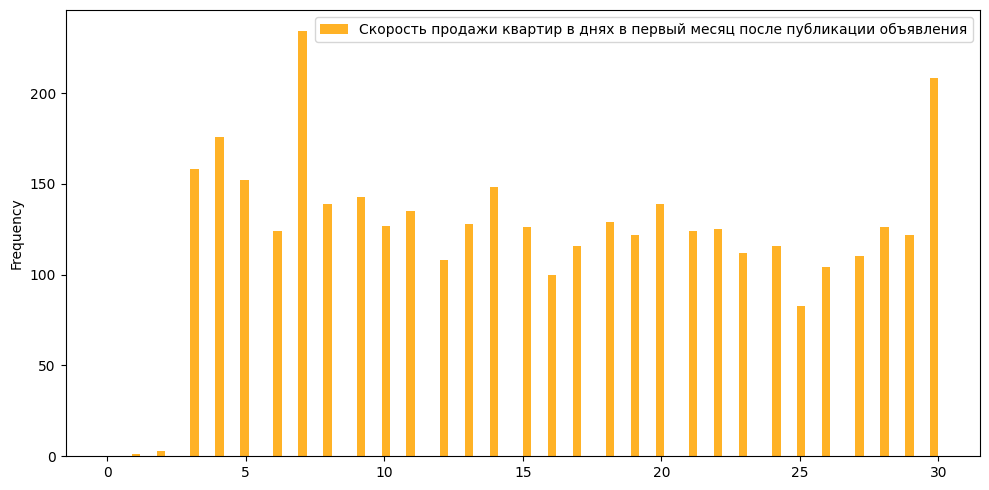

In [109]:
# построим гистограмму, отражающую скорость продажи квартир
# в первые 30 дней с момента публикации объявления
data['days_exposition'].plot(kind = 'hist', \
        bins = 100, label = 'Скорость продажи квартир в днях в первый месяц \
после публикации объявления',
legend = True, color = 'orange', alpha = 0.85, figsize = (10, 5),
range = (0, 30))
plt.tight_layout()

Гистограммы показывают, что не редки случаи, когда квартиры раскупают, как горячие пирожки. Однако, скорее предельно малые сроки активного статуса объявления по большей части связаны с отзывом объявления теми, кто его разместил (риэлтором или физическим лицом). Такое серьезное решение как покупка квартиры, уплата задатка редко принимается за один/два дня, да еще и сразу после публикации объявления. Как минимум необходимо назначить удобный день для просмотра и т.д. Условно реалистичным сроком, в который квартира может быть выставлена и куплена, можно считать период от 15 до 30 дней. Период более 30 дней, даже сверхдолгий, однозначно относится к реалистичному, - с большей долей вероятности квартира в этот период была именно куплена, а не просто произошел отзыв объявления о продаже

In [110]:
# посчитаем количество квартир, объявления о которых были размщены до 30 дней,
# более 30 дней, а также количество пропусков в столбце 'days_exposition'
print('Количество объявлений, активных до 30 дней:', \
      data.query('days_exposition < 30')['days_exposition'].count())
print('Количество объявлений, активных более 30 дней:', \
      data.query('days_exposition >= 31')['days_exposition'].count())
print('Количество пропусков в столбце \'days_exposition\':', \
     data['days_exposition'].isna().sum())

Количество объявлений, активных до 30 дней: 3530
Количество объявлений, активных более 30 дней: 16774
Количество пропусков в столбце 'days_exposition': 3181


Как правило квартиры в Санкт-Петербурге продаются в срок до 95 дней. Это медианное время продажи объекта недвижимости, и оно выглядит более предпочтительным в сравнении со средним, которое находится под сильным влиянием квартир, не находящих новых хозяев годами. Скорее всего среднее значение увеличивается за счет квартир, находящихся в небольших населенных пунктах вдали от Санкт-Петербурга, спрос на которые объективно невелик. За исследуемый период 3,5 тысячи объектов недвижимости были проданы (а в большинстве случаев скорее просто сняты с продажи передумавшими их продавать владельцами) менее чем за 30 дней. Необходимо обратить внимание на целую 3181-ну отсутствующую запись о сроке активности объявления (13,4% от всех объявлений). Наиболее вероятное объяснение - эти 3181 вариант как раз находятся в активном статусе, не проданы, поэтому справедливо, что показатель, отражающий, сколько дней было размещено объявление (от публикации до снятия) - не заполнено. Тем более что еще на первом этапе исследования мы выяснили, что пропусков в столбце 'first_day_exposition' нет - данные о дне размещения объявлений о продаже квартиры были заполнены для 100% объектов

#### Исследование факторов, больше всего влияющих на общую (полную) стоимость объекта недвижимости

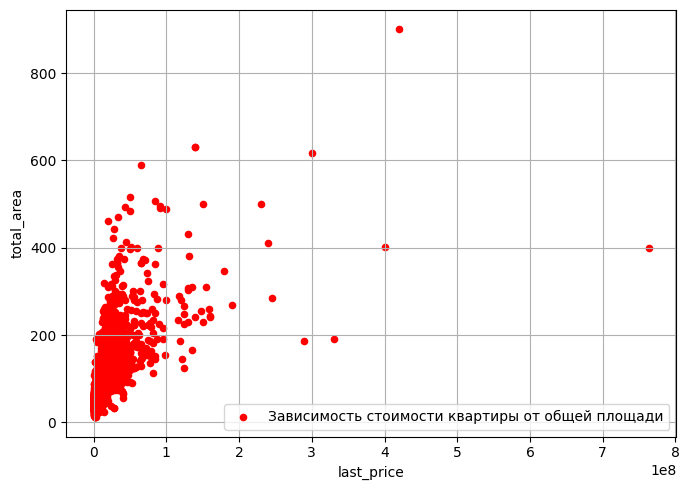

In [111]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от размера общей площади 'total_area'
data.plot(kind = 'scatter', x = 'last_price', y = 'total_area', grid = True, \
         label = 'Зависимость стоимости квартиры от общей площади', \
         legend = True, color = 'red', figsize = (7, 5))
plt.tight_layout()

In [112]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и размером общей площади 'total_area'
data['last_price'].corr(data['total_area']).round(2)

0.65

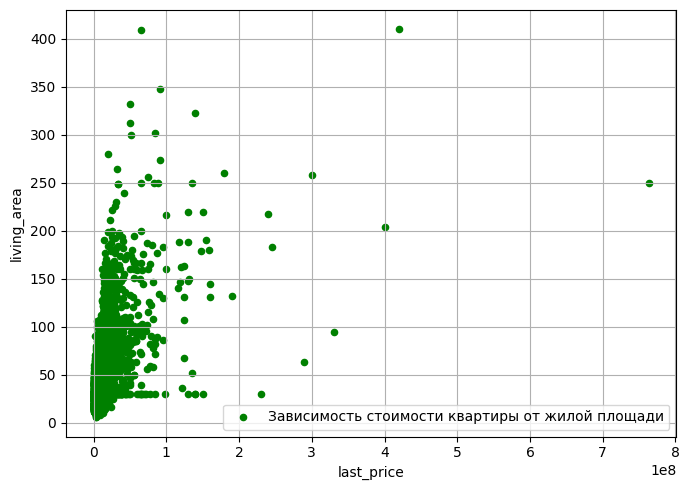

In [113]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от размера жилой площади 'living_area'
data.plot(kind = 'scatter', x = 'last_price', y = 'living_area', grid = True, \
         label = 'Зависимость стоимости квартиры от жилой площади', \
         legend = True, color = 'green', figsize = (7, 5))
plt.tight_layout()

In [114]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и размером жилой площади 'living_area'
data['last_price'].corr(data['living_area']).round(2)

0.54

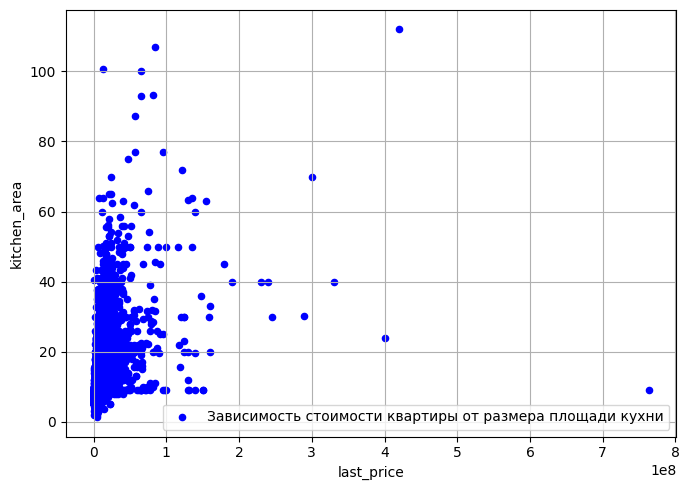

In [115]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от размера площади кухни 'kitchen_area'
data.plot(kind = 'scatter', x = 'last_price', y = 'kitchen_area', grid = True, \
         label = 'Зависимость стоимости квартиры от размера площади кухни', \
         legend = True, color = 'blue', figsize = (7, 5))
plt.tight_layout()

In [116]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и размером площади кухни 'kitchen_area'
data['last_price'].corr(data['kitchen_area']).round(2)

0.44

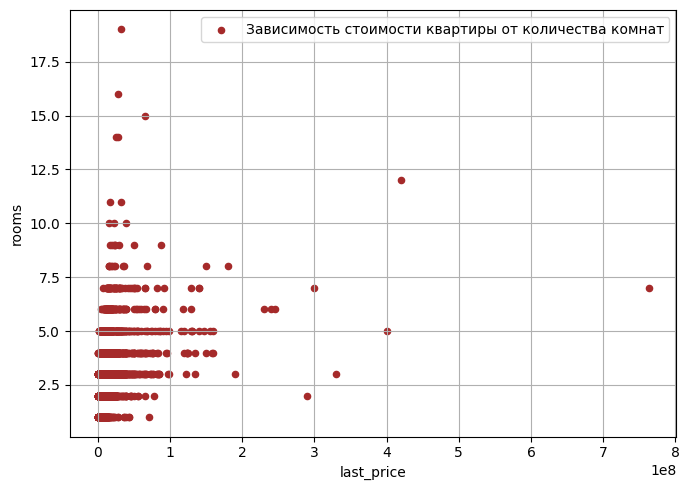

In [117]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от количества комнат 'rooms'
data.plot(kind = 'scatter', x = 'last_price', y = 'rooms', grid = True, \
         label = 'Зависимость стоимости квартиры от количества комнат', \
         legend = True, color = 'brown', figsize = (7, 5))
plt.tight_layout()

In [118]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и количеством комнат 'rooms'
data['last_price'].corr(data['rooms']).round(2)

0.37

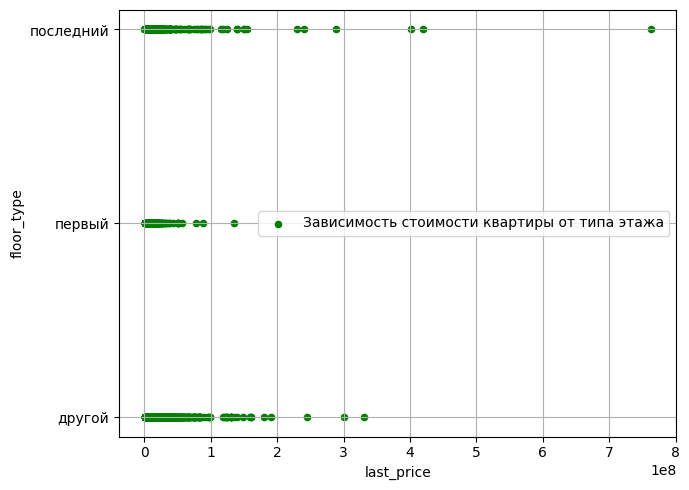

In [119]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от типа этажа ('первый', 'последний', 'другой') 'floor_type'
data.plot(kind = 'scatter', x = 'last_price', y = 'floor_type', grid = True, \
         label = 'Зависимость стоимости квартиры от типа этажа', \
         legend = True, color = 'green', figsize = (7, 5))
plt.tight_layout()

Коэффициент корреляции Пирсона между стоимостью квартиры 'last_price' и типом этажа ('первый', 'последний', 'другой') 'floor_type' рассчитывать не будем, т.к. первый тип данных относится к числовому, втрой - к строковому

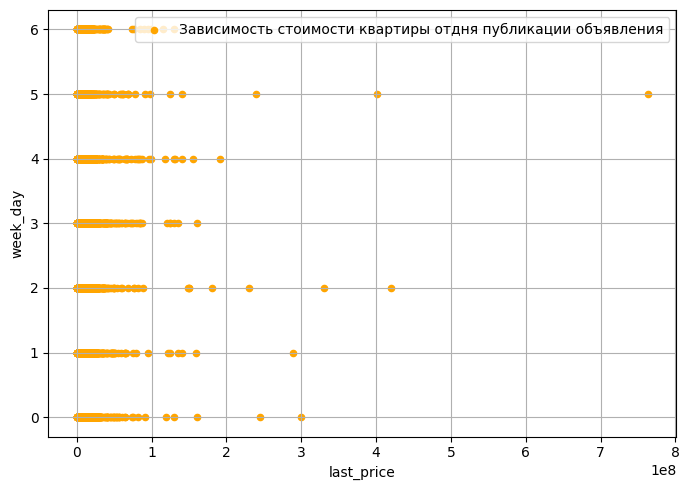

In [120]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от дня публикации объявления 'week_day'
data.plot(kind = 'scatter', x = 'last_price', y = 'week_day', grid = True, \
         label = 'Зависимость стоимости квартиры отдня публикации объявления', \
         legend = True, color = 'orange', figsize = (7, 5))
plt.tight_layout()

In [121]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и днем публикации объявления 'week_day'
data['last_price'].corr(data['week_day']).round(2)

0.0

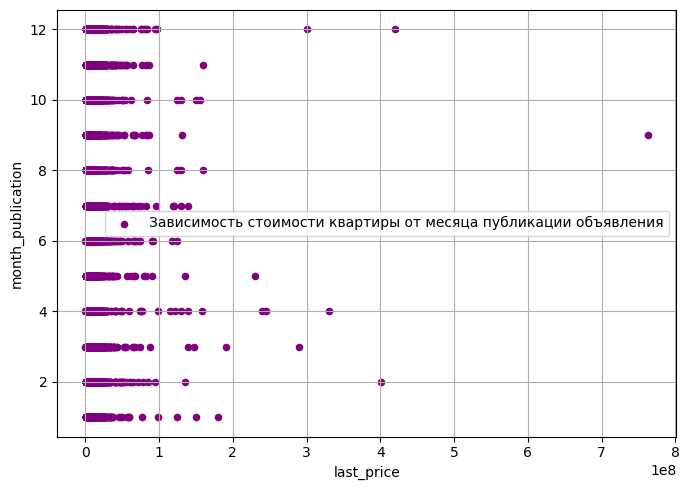

In [122]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от месяца публикации объявления 'month_publication'
data.plot(kind = 'scatter', x = 'last_price', y = 'month_publication', grid = True, \
         label = 'Зависимость стоимости квартиры от месяца публикации объявления', \
         legend = True, color = 'purple', figsize = (7, 5))
plt.tight_layout()

In [123]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и месяцем публикации объявления 'month_publication'
data['last_price'].corr(data['month_publication']).round(2)

0.0

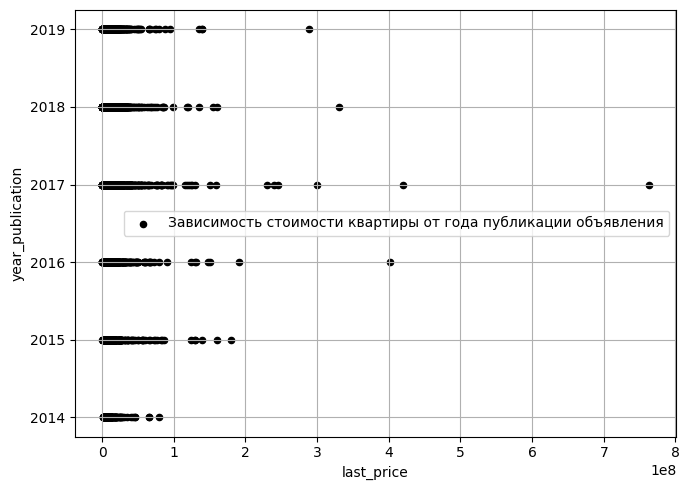

In [124]:
# построим диаграмму, отражающую зависимость стоимости квартиры 'last_price'
# от года публикации объявления 'year_publication'
data.plot(kind = 'scatter', x = 'last_price', y = 'year_publication', grid = True, \
         label = 'Зависимость стоимости квартиры от года публикации объявления', \
         legend = True, color = 'black', figsize = (7, 5))
plt.tight_layout()

In [125]:
# рассчитаем коэфф-т корреляции Пирсона между стоимостью квартиры 'last_price'
# и годом публикации объявления 'year_publication'
data['last_price'].corr(data['year_publication']).round(2)

-0.04

**Самое высокое** влияние на стоимость объекта недвижимости среди рассмотренных показателей оказывает общая площадь квартиры (коэффициент корреляции 0,64). Впрочем, это вовсе не означает, что уровень зависимости высокий. Величина коэффициента, конечно, свидетельствует о наличии зависимости, но она не настолько высока и заставляет предполагать наличие других факторов, причем не обязательно тех, которые были исследованы в текущем подразделе в соответствии с условием.

**На втором месте** по влиянию на стоимость квартиры среди изученных факторов находится размер жилой площади (коэффициент корреляции 0,54). Этой величины уже недостаточно, чтобы заявить о наличии взаимосвязи между жилой площадью и итоговой ценой квартиры. **На третьем месте** находится такой фактор, как площадь кухни (коэффициент корреляции 0,44). Еще менее выражено влияние на стоимость недвижимости количества комнат (0,37). Такие показатели, как день недели публикации объявления, месяц публикации, год публикации вообще не влияют на стоимость объекта недвижимости.

Коэффициент корреляции между стоимостью квартиры и типом этажа квартиры не был рассчитан из-за наличия несопоставимых типов данных (числовой и строковый), однако диаграмма рассеивания показывает наличие не очень сильно выраженной связи: квартиры на первом этаже в целом стоят дешевле. Объяснить это можно тем, что среди объявлений много объектов в небольших населенных пунктах, удаленных от Санкт-Петербурга, отличающихся почти исключительно малоэтажной застройкой. Недвижимость в таких населенных пунктах стоит заметно дешевле, чем в многоэтажных домах Санкт-Петербурге и крупнейших городах Ленинградской области.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

**ПЕРВЫЙ ВАРИАНТ РЕШЕНИЯ**

In [126]:
# определим 10 населенных пунктов с наибольшим числом объявлений
data.groupby('locality_name')['week_day'].count() \
.sort_values(ascending = False).head(10)

locality_name
Санкт-Петербург    15716
Мурино               589
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: week_day, dtype: int64

In [127]:
# с помощью фильтрации методом query() определим общую стоимость квратир,
# общий метраж всех квартир в соответтсвующем населенном пункте,
# разделим общую стоимость на общее количество квадратных метров,
# чтобы получить стоимость одного квадратного метра недвижимости
print('1. Санкт-Петербург:', \
((data.query('locality_name == "Санкт-Петербург"')['last_price'].sum())/ \
(data.query('locality_name == "Санкт-Петербург"')['total_area'].sum())).round())

print('2. Мурино:', \
((data.query('locality_name == "Мурино"')['last_price'].sum())/ \
(data.query('locality_name == "Мурино"')['total_area'].sum())).round())

print('3. Кудрово:', \
((data.query('locality_name == "Кудрово"')['last_price'].sum())/ \
(data.query('locality_name == "Кудрово"')['total_area'].sum())).round())

print('4. Шушары:', \
((data.query('locality_name == "Шушары"')['last_price'].sum())/ \
(data.query('locality_name == "Шушары"')['total_area'].sum())).round())

print('5. Всеволожск:', \
((data.query('locality_name == "Всеволожск"')['last_price'].sum())/ \
(data.query('locality_name == "Всеволожск"')['total_area'].sum())).round())

print('6. Пушкин:', \
((data.query('locality_name == "Пушкин"')['last_price'].sum())/ \
(data.query('locality_name == "Пушкин"')['total_area'].sum())).round())

print('7. Колпино:', \
((data.query('locality_name == "Колпино"')['last_price'].sum())/ \
(data.query('locality_name == "Колпино"')['total_area'].sum())).round())

print('8. Парголово:', \
((data.query('locality_name == "Парголово"')['last_price'].sum())/ \
(data.query('locality_name == "Парголово"')['total_area'].sum())).round())

print('9. Гатчина:', \
((data.query('locality_name == "Гатчина"')['last_price'].sum())/ \
(data.query('locality_name == "Гатчина"')['total_area'].sum())).round())

print('10. Выборг:', \
((data.query('locality_name == "Выборг"')['last_price'].sum())/ \
(data.query('locality_name == "Выборг"')['total_area'].sum())).round())

1. Санкт-Петербург: 124472.0
2. Мурино: 83398.0
3. Кудрово: 93947.0
4. Шушары: 76328.0
5. Всеволожск: 67635.0
6. Пушкин: 105097.0
7. Колпино: 74468.0
8. Парголово: 87111.0
9. Гатчина: 68475.0
10. Выборг: 57898.0


In [128]:
# создаем небольшой датафрейм из полученных результатов
# о стоимости квадратного метра жилья в соответствующем городе
meter_price = pd.DataFrame(
{'город': ['Санкт-Петербург',
           'Мурино',
           'Кудрово',
           'Шушары',
           'Всеволожск',
           'Пушкин',
           'Колпино',
           'Парголово',
           'Гатчина',
           'Выборг'],
'стоимость одного кв. метра жилья': [124472,
                                    83398,
                                    93947,
                                    76328,
                                    67635,
                                    105097,
                                    74468,
                                    87111,
                                    68475,
                                    57898]})
meter_price.sort_values(by = 'стоимость одного кв. метра жилья', \
                       ascending = False).reset_index(drop = True)

,город,стоимость одного кв. метра жилья
0,Санкт-Петербург,124472
1,Пушкин,105097
2,Кудрово,93947
3,Парголово,87111
4,Мурино,83398
5,Шушары,76328
6,Колпино,74468
7,Гатчина,68475
8,Всеволожск,67635
9,Выборг,57898


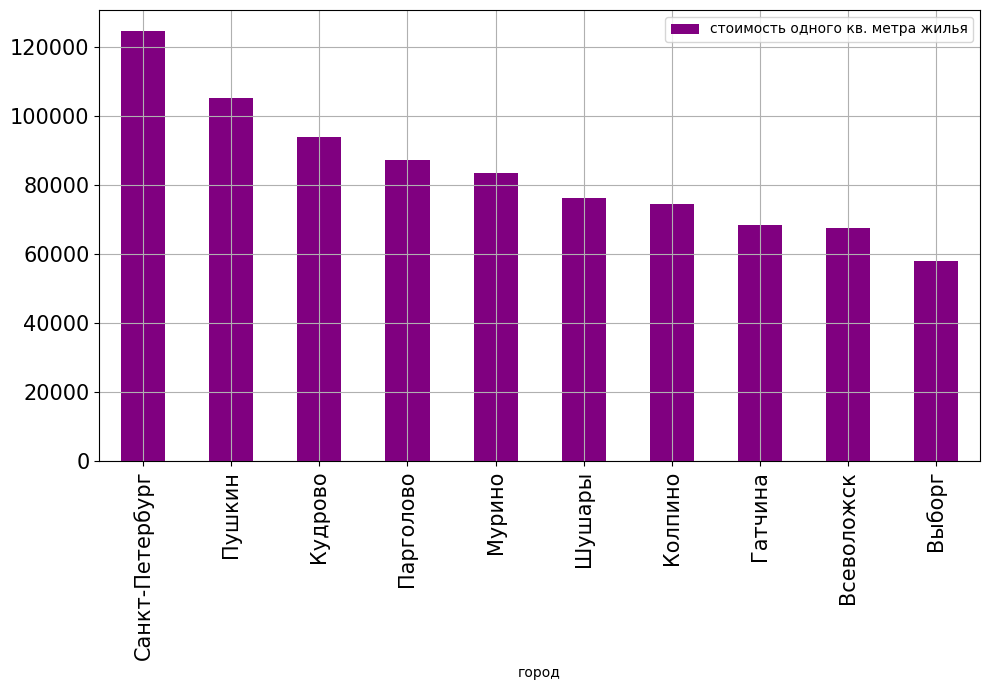

In [129]:
meter_price.sort_values(
    by = 'стоимость одного кв. метра жилья',
    ascending = False).plot(
    kind = 'bar', grid = True, label = 'Cтоимость одного кв. метра жилья',
    legend = True, figsize = (10, 7), fontsize = 15, x = 'город',
    color = 'purple'
)
plt.tight_layout()

По итогам изучения средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявленийбыло установлено, что ***самая высокая цена*** за один квадратный метр наблюдается в населенных пунктах:
- Санкт-Петербург (124472 руб/кв. метр)
- Пушкин (105097 руб/кв. метр)
- Кудрово (93947 руб/кв. метр)

***Самая низкая цена*** в исследуемой группе наблюдается в следующих населенных пунктах:
- Выборг (57898 руб/кв. метр)
- Всеволожск (67635 руб/кв. метр)
- Гатчина (68475 руб/кв. метр)


**ВТОРОЙ ВАРИАНТ РЕШЕНИЯ**

**Первый вариант** решения ***далеко не всегда можно реализовать***. Вручную посчитать показатели по 10 отсортированным населенным пунктам - задача вполне посильная. Но что если бы была поставлена задача посчитать среднюю стоимость среди всех 305 населенных пунктов (304 населенных пунктов и 49 населенных пунктов, названия которых не были указаны - категория 'Другие'). Такой расчет вручную занял бы продолжительное время, и неизбежно в него вкрались бы ошибки и погрешности. Поэтому необходим вариант с более высоким уровнем автоматизации расчетов.

In [130]:
# создаем датасет с отфильтрованной информацией по стоимости недвижимости
# по населенным пунктам, сортируем по названиям насел. пунктов по возрастанию
price_sorted = data.pivot_table(
    index = ['locality_name'], values = 'last_price',
    aggfunc = 'sum').sort_values(by = 'locality_name',
    ascending = True).reset_index()
price_sorted.head()

,locality_name,last_price
0,Агалатово,14270000.0
1,Александровская,17450000.0
2,Алексеевка,1000000.0
3,Аннино,49857830.0
4,Аро,9720000.0


In [131]:
# создаем датасет с отфильтрованной информацией по общей площади недвижимости
# по населенным пунктам, сортируем по названиям насел. пунктов по возрастанию
area_sorted = data.pivot_table(
    index = ['locality_name'], values = 'total_area',
    aggfunc = 'sum').sort_values(by = 'locality_name',
    ascending = True).reset_index()
area_sorted.head()

,locality_name,total_area
0,Агалатово,196.7
1,Александровская,237.0
2,Алексеевка,45.0
3,Аннино,786.0
4,Аро,190.3


In [132]:
# создаем датасет с отфильтрованной информацией по кол-ву объявлений о недвижимости
# по населенным пунктам, сортируем по названиям насел. пунктов по возрастанию
ads_number = data.pivot_table(
    index = ['locality_name'], values = 'week_day',
    aggfunc = 'count').sort_values(by = 'locality_name',
    ascending = True).reset_index()
# количество объявлений мы получили по столбцу 'week_day', но для новой таблицы
# это название столбца не подходит, поэтому переименуем столбец
ads_number.columns = ['locality_name', 'ads_number']
ads_number.head()

,locality_name,ads_number
0,Агалатово,4
1,Александровская,2
2,Алексеевка,1
3,Аннино,16
4,Аро,3


In [133]:
# объединяем таблицы 'price_sorted' и 'area_sorted'
# по общему столбцу 'locality_name'
price_final = price_sorted.merge(
    area_sorted, on = 'locality_name', how = 'right'
)
price_final.head()

,locality_name,last_price,total_area
0,Агалатово,14270000.0,196.7
1,Александровская,17450000.0,237.0
2,Алексеевка,1000000.0,45.0
3,Аннино,49857830.0,786.0
4,Аро,9720000.0,190.3


In [134]:
# объединяем таблицы 'price_final' и 'ads_number'
# по общему столбцу 'locality_name'
price_final = price_final.merge(
    ads_number, on = 'locality_name', how = 'right'
).reset_index(drop=True)
# для исключения путаницы из-за одинаковых названий столбцов в data
# и price_final изменим названия столбцов 'last_price' и 'total_area'
price_final.columns = ['locality_name', 'last_price_sum',
    'total_area_sum', 'ads_number']
price_final.head()

,locality_name,last_price_sum,total_area_sum,ads_number
0,Агалатово,14270000.0,196.7,4
1,Александровская,17450000.0,237.0,2
2,Алексеевка,1000000.0,45.0,1
3,Аннино,49857830.0,786.0,16
4,Аро,9720000.0,190.3,3


In [135]:
# создаем новый столбец 'price_per_meter_mean' с показателями
# средней стоимости одного кв. метра в населенных пунктах,
# разделив соответствующие значения столбца 'last_price'
# на значения столбца 'total_area'. Полученные значения округляем до целых чисел
price_final['price_per_meter_mean'] = (
    price_final['last_price_sum'] / price_final['total_area_sum']).round()
price_final.head()

,locality_name,last_price_sum,total_area_sum,ads_number,price_per_meter_mean
0,Агалатово,14270000.0,196.7,4,72547.0
1,Александровская,17450000.0,237.0,2,73629.0
2,Алексеевка,1000000.0,45.0,1,22222.0
3,Аннино,49857830.0,786.0,16,63432.0
4,Аро,9720000.0,190.3,3,51077.0


In [136]:
# избавимся от экспоненциального представления чисел в столбце 'last_price'
pd.set_option("display.float_format", "{:.0f}".format)
# отсортируем 10 населенных пунктов с самым большим числом объявлений
# о недвижимости
price_final.sort_values(by = 'ads_number', ascending = False).head(10)

,locality_name,last_price_sum,total_area_sum,ads_number,price_per_meter_mean
222,Санкт-Петербург,126666113626,1017627,15716,124472
146,Мурино,2167962700,25995,589,83398
106,Кудрово,2057300760,21899,472,93947
296,Шушары,1807555999,23681,440,76328
34,Всеволожск,1508048965,22297,398,67635
202,Пушкин,2387074264,22713,369,105097
89,Колпино,1339839246,17992,338,74468
170,Парголово,1467600459,16848,327,87111
42,Гатчина,1070919360,15639,307,68475
35,Выборг,770483000,13308,237,57898


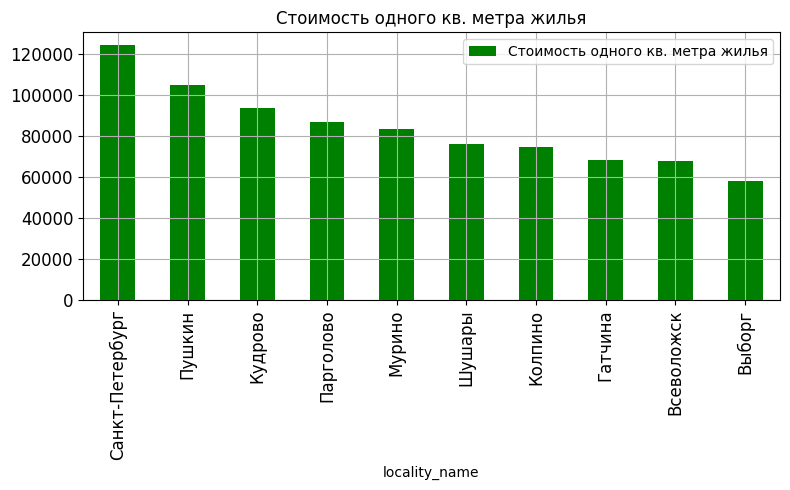

In [137]:
# отфильтруем из price_final 10 населенных пунктов с самым большим
# числом объявлений (все они соотвтетствуют условияю 'ads_number > 236')
# и по отсортированным данным построим гистограмму
price_final.query(
    'ads_number > 236').sort_values(
    by = 'price_per_meter_mean', ascending = False).plot(
    kind = 'bar', label = 'Стоимость одного кв. метра жилья',
    x = 'locality_name', y = 'price_per_meter_mean',
    color = 'green', grid = True, figsize = (8, 5), fontsize = 12,
    title = 'Стоимость одного кв. метра жилья')
plt.tight_layout()

In [138]:
# в виде таблицы выведем список 10 населенных пунктов
# с самым большим числом объявлений, отсортированный по
# средней стоимости одного квадратного метра
price_final.query(
    'ads_number > 236').sort_values(
    by = 'price_per_meter_mean', ascending = False).reset_index()

,index,locality_name,last_price_sum,total_area_sum,ads_number,price_per_meter_mean
0,222,Санкт-Петербург,126666113626,1017627,15716,124472
1,202,Пушкин,2387074264,22713,369,105097
2,106,Кудрово,2057300760,21899,472,93947
3,170,Парголово,1467600459,16848,327,87111
4,146,Мурино,2167962700,25995,589,83398
5,296,Шушары,1807555999,23681,440,76328
6,89,Колпино,1339839246,17992,338,74468
7,42,Гатчина,1070919360,15639,307,68475
8,34,Всеволожск,1508048965,22297,398,67635
9,35,Выборг,770483000,13308,237,57898


***По итогам второго враианта решения задачи п. 4.4 получены ровно те же результаты, что и в первом варианте решения. Продублируем их***

По итогам изучения средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений было установлено, что ***самая высокая цена*** за один квадратный метр наблюдается в населенных пунктах:
- Санкт-Петербург (124472 руб/кв. метр)
- Пушкин (105097 руб/кв. метр)
- Кудрово (93947 руб/кв. метр)

***Самая низкая цена*** в исследуемой группе наблюдается в следующих населенных пунктах:
- Выборг (57898 руб/кв. метр)
- Всеволожск (67635 руб/кв. метр)
- Гатчина (68475 руб/кв. метр)

#### Влияние фактора близости к центру города на стоимость квартир в Санкт-Петербурге

Подход к выполнению задачи будет следующим: из всего датасета отфильтруем строки, касающиеся объектов в Санкт-Петербурге. Проверим максимальное удаление объекта недвижимости от центра Санкт-Петербурга. Распределим квартиры на категории в зависимости от близости к центру Санкт-Петербурга и посчитаем среднюю стоимость. В итоге определим, как близость к центру города влияет на общую стоимость квартиры и насколько это влияние сильно выражено.

In [139]:
# формируем датасет о всех объявленияч о квартирах,
# продающихся в Санкт-Петербурге
spb_flats = data.query('locality_name == "Санкт-Петербург"')
spb_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_meter,week_day,month_publication,year_publication,floor_type,distance_to_center
0,20,13000000,108,2019-03-07,3,3,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,2,NaN,120370,3,3,2019,другой,16
2,10,5196000,56,2015-08-20,2,3,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,2,558,92785,3,8,2015,другой,14
3,0,64900000,159,2015-07-24,3,3,14,30,9,False,False,False,9,0,Санкт-Петербург,28098,6800,2,3,424,408176,4,7,2015,другой,7
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,1,121,100000,1,6,2018,другой,8
7,5,7915000,72,2019-04-18,2,3,24,30,22,False,False,False,19,2,Санкт-Петербург,23982,11634,0,0,NaN,110544,3,4,2019,другой,12


In [140]:
# проверяем, что в таблице для анализа отфильтрованы только квартиры,
# находящиеся в Санкт-Петербурге
spb_flats['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

In [141]:
# определяем максимальное и минимальное расстояние от центра Санкт-Петербурга
# среди всех продаваемых квартир
spb_flats['distance_to_center'].describe()

count   15655
mean       12
std         5
min         0
25%         8
50%        12
75%        15
max        29
Name: distance_to_center, dtype: Float64

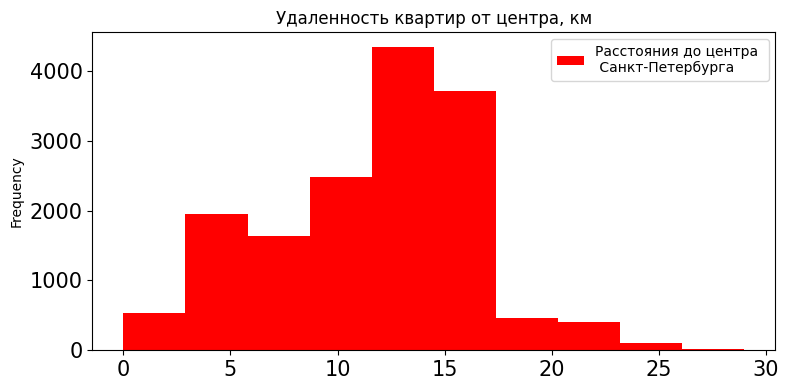

In [142]:
# построим гистограмму, показывающую частотность расстояний
# объектов недвижимости до центра Санкт-Петербурга
spb_flats['distance_to_center'].plot(
    kind = 'hist', label = 'Расстояния до центра \n Санкт-Петербурга',
    legend = True, color = 'red', figsize = (8, 4),
    fontsize = 15, title = 'Удаленность квартир от центра, км'
)
plt.tight_layout()

По диаграмме видно, что основная часть квартир удалены от центра Санкт-Петербурга на 8-17 километров. Разделяя квартиры на категории мы не будем подбирать интервалы расстояний таким образом, чтобы количество квартир в пределах этих интервалов было примерно одинаковым. Это исказит влияние фактора удаленности. Поэтому категоризация будет выполнена на основе равных друг другу отрезков по 5 км. В результате будет выделено 6 категорий объектов недвижимости

In [143]:
def flat_category(distance_to_center):
    """
    с помощью функции разобьем квартиры на категории в зависимости от
    расстояния до центра Санкт-Петербурга
    """
    try:
        if 0 <= distance_to_center <= 5:
            return 'A'
        if 5 < distance_to_center <= 10:
            return 'B'
        if 10 < distance_to_center <= 15:
            return 'C'
        if 15 < distance_to_center <= 20:
            return 'D'
        if 20 < distance_to_center <= 25:
            return 'E'
        if 25 < distance_to_center <= 30:
            return 'F'
    except:
        return 'нет категории'
# применяем функцию к датасету spb_flats, создав столбец 'flat_category'
spb_flats['flat_category'] = spb_flats[
    'distance_to_center'].apply(flat_category)
# проверим корректность заполнения нового столбца,
# посмотрев 10 наугад выбранных строк
spb_flats[['distance_to_center', 'flat_category']].sample(10)

,distance_to_center,flat_category
8524,14,C
6749,13,C
10008,6,B
18138,6,B
1019,11,C
1569,17,D
4758,15,C
13645,11,C
3350,13,C
6703,5,A


Следующим шагом станет вычисление средней стоимости квартиры в зависимости от количества километров до центра Санкт-Петербурга (по шести выделенным категориям)

In [144]:
# создаем датасет с информацией об общей стоимости объектов недвижимости,
# сгрупипрванных по категориям в зависимости от удаления
# от центра Санкт-Петербурга
spb_flat_price = spb_flats.pivot_table(
    index = ['flat_category'], values = 'last_price',
    aggfunc = 'sum').sort_values(by = 'flat_category').reset_index()
# для исключения путаницы переименуем столбец 'last_price'
# в датасете spb_flat_price в 'last_price_per_category'
spb_flat_price.columns = ['flat_category', 'last_price_per_category']
spb_flat_price

,flat_category,last_price_per_category
0,A,36822034650
1,B,30356325859
2,C,41995101232
3,D,13881568829
4,E,2366017829
5,F,287774663
6,нет категории,957290564


In [145]:
# создаем датасет с информацией об общей площади объектов недвижимости,
# сгрупипрванных по категориям в зависимости от удаления
# от центра Санкт-Петербурга
spb_flat_area = spb_flats.pivot_table(
    index = ['flat_category'], values = 'total_area',
    aggfunc = 'sum').sort_values(by = 'flat_category').reset_index()
# для исключения путаницы переименуем столбец 'total_area'
# в датасете spb_flat_area в 'total_area_per_category'
spb_flat_area.columns = ['flat_category', 'total_area_per_category']
spb_flat_area

,flat_category,total_area_per_category
0,A,237849
1,B,210539
2,C,392919
3,D,141331
4,E,26253
5,F,3324
6,нет категории,5412


In [146]:
# объединим таблицы spb_flat_price и spb_flat_area
spb_flat_final = spb_flat_price.merge(
    spb_flat_area, on = 'flat_category', how = 'right')
spb_flat_final

,flat_category,last_price_per_category,total_area_per_category
0,A,36822034650,237849
1,B,30356325859,210539
2,C,41995101232,392919
3,D,13881568829,141331
4,E,2366017829,26253
5,F,287774663,3324
6,нет категории,957290564,5412


В результате категоризации объектов недвижимости появилась группа 'нет категории'. Посмотрим, какие квартиры попали в эту категорию

In [147]:
spb_flats.query('flat_category == "нет категории"').reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_meter,week_day,month_publication,year_publication,floor_type,distance_to_center,flat_category
0,81,9,10949000,68,2018-12-27,1,3,10,30,6,False,False,False,9,0,Санкт-Петербург,NaN,NaN,0,0,NaN,161014,3,12,2018,другой,<NA>,нет категории
1,593,20,4200000,38,2019-04-16,1,3,16,20,10,False,False,False,10,2,Санкт-Петербург,NaN,NaN,0,0,NaN,109660,1,4,2019,другой,<NA>,нет категории
2,604,11,9899000,101,2018-12-12,3,3,5,62,3,False,False,False,15,0,Санкт-Петербург,NaN,NaN,0,0,NaN,98009,2,12,2018,другой,<NA>,нет категории
3,742,7,37000000,161,2016-05-22,3,3,9,84,8,False,False,False,9,0,Санкт-Петербург,NaN,NaN,0,0,402,229813,6,5,2016,другой,<NA>,нет категории
4,795,19,7100000,60,2019-02-13,2,3,5,37,2,False,False,False,12,0,Санкт-Петербург,NaN,NaN,0,0,NaN,119127,2,2,2019,другой,<NA>,нет категории
5,1336,12,18500000,66,2017-06-08,1,3,7,25,7,False,False,False,35,1,Санкт-Петербург,NaN,NaN,0,0,130,280303,3,6,2017,последний,<NA>,нет категории
6,1872,13,3100000,32,2019-03-15,1,3,4,19,2,False,False,False,5,0,Санкт-Петербург,NaN,NaN,0,0,3,96875,4,3,2019,другой,<NA>,нет категории
7,1895,12,9500000,130,2019-03-27,5,3,5,90,2,False,False,False,15,0,Санкт-Петербург,NaN,NaN,0,0,15,73076,2,3,2019,другой,<NA>,нет категории
8,2364,17,4300000,33,2019-04-28,1,3,25,14,17,False,False,False,8,0,Санкт-Петербург,NaN,NaN,0,0,NaN,131901,6,4,2019,другой,<NA>,нет категории
9,2707,14,5650000,51,2019-02-26,2,3,9,31,5,False,False,False,10,0,Санкт-Петербург,NaN,NaN,0,0,NaN,110784,1,2,2019,другой,<NA>,нет категории


В категорию 'нет категории' попали квартиры, в объявления о которых не было указано расстояние до центра Санкт-Петербурга. К таковым относится 61 объект недвижимости. Указанное количество не повлияет на результаты исследования

In [148]:
# рассчитаем стоимость квадратного метра жилья по категориям,
# создав новый столбец в датасете spb_final_flat
spb_flat_final['flat_price_meter_per_category'] = \
    spb_flat_final['last_price_per_category'] / \
    spb_flat_final['total_area_per_category']
spb_flat_final.sort_values(
    by = 'flat_price_meter_per_category',
    ascending = False
)

,flat_category,last_price_per_category,total_area_per_category,flat_price_meter_per_category
6,нет категории,957290564,5412,176895
0,A,36822034650,237849,154812
1,B,30356325859,210539,144184
2,C,41995101232,392919,106880
3,D,13881568829,141331,98221
4,E,2366017829,26253,90125
5,F,287774663,3324,86576


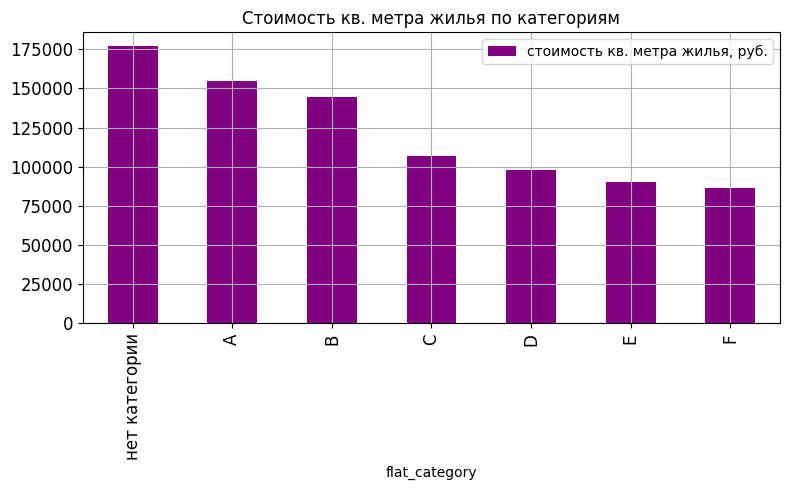

In [149]:
# построим гистограмму, отражающую зависимость стоимости
# квадратного метра квартиры в зависимости от ее удаленности
# от центра Санкт-Петербурга
spb_flat_final.sort_values(by = 'flat_price_meter_per_category', \
    ascending = False).plot(
    kind = 'bar', title = 'Стоимость кв. метра жилья по категориям',
    grid = True, color = 'purple', legend = True,
    label = 'стоимость кв. метра жилья, руб.', x = 'flat_category',
    y = 'flat_price_meter_per_category', figsize = (8, 5),
    fontsize = 12)
plt.tight_layout()

По итогам изучения влияния фактора близости к центру города на стоимость квартир в Санкт-Петербурге отметим, что самая высокая стоимость квадратного метра жилья оказалась в категории 'нет категории'. Вероятнее всего в этой категории как раз оказались квартиры, находящиеся в историческом центре Санкт-Петербурга.

In [150]:
# определим среднюю стоимость квартиры в Санкт-Петербурге,
# относящейся к категории 'нет категории'
spb_flats.query('flat_category == "нет категории"')['last_price'].mean().round()

15693288.0

In [151]:
#  определим среднюю стоимость всех квратир,
# продаваемых в Санкт-Петербурге
data.query('locality_name == "Санкт-Петербург"')['last_price'].mean().round()

8059692.0

Средняя стоимость квартиры из категории 'нет категории' почти в два раза выше средней стоимости всех квартир, продаваемых в Санкт-Петербурге. Соответственно можно сделать вывод о том, что категории 'нет категории' и 'А' (0-5 км до центра Санкт-Петербурга) и 'B' (5-10 км от центра города) пересекаются. Выявление указанного факта не требует проведения пересчета: зависимость стоимости квартиры, продаваемой в Санкт-Петербурге, от близости к центру города, не вызывает сомнений.

### Общий вывод

В результате исследования был проведен анализ архива объявлений о продаже квартир сервиса «Яндекс. Недвижимость» за несколько лет. Основная цель проекта – установить ключевые параметры датасета, включающего более 23 тысяч записей об объявлениях о продаже недвижимости.

Исследование включало четыре этапа.

На **ПЕРВОМ ЭТАПЕ**, посвященном общему изучению массива данных:

- данные датасета ‘расклеены’ с помощью параметра sep = '\t'

- названия столбцов датасета приведены к ‘змеиному регистру’

- исследованы общие параметры данных: количество строк и столбцов, количество пропусков, доля пропусков от общего числа значений, максимальные и минимальные значения

- построена общая гистограмма для всех столбцов необработанных данных датасета, по итогам анализа 17 гистограмм сделаны следующие выводы:

    * объявления о продаваемых квартирах в целом снабжены достаточным количеством иллюстрирующих фотографий;

    * общая площадь большинства квартир не превышает 100 кв. метров, жилая – 50 кв. метров, кухни – 10 кв. метров; число квартир с одним, двумя или тремя балконами в массиве объявлений о продаже примерно одинаково, квартиры с 3 и более балконами редки;

    * основное количество предлагаемых к продаже квартир являются 1-но и 2-х комнатными;

    * столбцы ‘last_price’, ‘ceiling_height’ включают некорректные и/или аномальные значения

    * в столбце с информацией об этажности домов, в которых предлагаются к продаже квартиры, имеется информация о количестве этажей, которых в реальности в Санкт-Петербурге нет. Это относится к высотным домам с числом указанных этажей 35 и 36. Также выявлены объявления о продаже квартир в домах с 52-мя и 60-тью этажами, хотя количество этажей дома-рекордсмена северной столицы равно 37. Большинство квартир продаются в домах, имеющих до 10 этажей

    * основная часть квартир находится примерно в 20 км. от аэропорта Пулково и менее чем в 20 км от центра Санкт-Петербурга; чаще всего рядом есть парк и/или водоем;

    * как правило квартиры продаются не более 200 дней; количество квартир, длительно находящихся на продаже, невелико.



На **ВТОРОМ ЭТАПЕ**, посвященном предобработке данных:

- проведено подробное изучение пропусков в столбцах, в 14 из 22 столбцах были обнаружены пропуски. Пропущенные значения в зависимости от показателя либо были заполнены медианным значением по выборке указанных данных, либо нулями, либо NaN. заполнение пропущенных значений медианным позволило исключить негативное влияние немногочисленных, но значительных по размерам выбросов (аномальных значений)

- было принято решение удалить два столбца со значениями о расстоянии до ближайшего парка и водоема, т.к. в обоих столбцах было пропущено более 60% значений

- в семи столбцах из 20 оставшихся после удаления двух столбцов были изменены типы данных; изменения были продиктованы логикой этих показателей и необходимостью применения к ним определенных функций и методов на последующих этапах исследования

- важным элементом исследования стало удаление неявных дубликатов. В представленном датасете неявные дубликаты были обнаружены только в столбце ‘locality_name’. После трехэтапного удаления дубликатов с помощью метода replace() количество уникальных названий населенных пунктов сократилось с 365 до 305 (из которых 304 – это населенные пункты, 1 – группа населенных пунктов, название которых не было указано, включает 49 населенных пунктов без указания названия)

- были найдены и устранены редкие и аномальные значения в столбцах ‘living_area’, ‘floors_total’, ‘ceiling_height’,


На **ТРЕТЬЕМ ЭТАПЕ** в исходную таблицу были добавлены новые столбцы:

- столбец с ценой одного кв. метра 'price_per_meter'

- столбец со днем публикации объявления о продаже квартиры 'week_day'

- столбец с месяцем публикации объявления о продаже квартиры 'month_publication'

- столбец с годом публикации объявления о продаже квартиры 'year_publication'

- столбец, включающий сведения о типе этажа квартиры ('первый', 'последний', 'другой')

- столбец с данными о расстоянии до центра Санкт-Петербурга от продаваемой квартиры в км 'distance_to_center'


На **ЧЕТВЕРТОМ ЭТАПЕ** были получены и интерпретированы следующие результаты:

- ***объявления о недвижимости исследованы по 13 параметрам. Ключевыми сформулированными положениями стали***:

    * общая площадь  основной части продаваемых квартир находится в пределах от 25 до 75 квадратных метров;  жилая площадь – от 35 до 50 квадратных метров; площадь кухни – от 10 до 13 квадратных метров. Количество комнат в продаваемых квартирах составляет от одной до трех; количество предлагаемых квартир с четырьмя и более комнатами ограничено в размерах. Самая распространенная высота потолка – 2,65 метров, также предлагается значительное число квартир с высотой потолка 2,5 и 3 метра. Примерно 40% продаваемых квартир находятся на этажах с 1 по 4-й, еще около 40% на этажах с 5 по 10-й, остальные - в домах повышенной этажности и высотных домах. Примерно по 12,5% квартир находятся на первом и последнем этаже, все остальные – на этажах со второго до предпоследнего. Самыми часто встречающимися являются дома с 5-ю, 9-ю и 10-ю этажами, немало объявлений о продаже квартир в 16-ти и 25-ти этажных домах

    * самая дорогая квартира в исследуемом массиве данных стоит 76 млн. рублей. Широко представлены дорогие квартиры стоимостью от 8 до 20 млн. рублей. Основное количество продаваемых квартир оценены их продавцами в размере от 4 до 6 млн. рублей.

    * около четверти всех квартир находятся на расстоянии менее 10 км до центра Санкт-Петербурга; порядка 60% - на расстоянии от 10 до 20 км. Аэропорт Пулково более отдален от большинства продаваемых квартир: примерно половина всех квартир расположена в 10-20 км от аэропорта, около 40% квартир – на расстоянии 20-60 км.

    * объявления о продаже квартир как правило размешают в будние дни, в субботу и воскресение размещается в два раза меньше объявлений, чем в среднем в каждый из будних дней. В течении года максимальное количество объявлений появляется в феврале, марте, апреле и ноябре. Минимальная активность характерна для января, мая и декабря. В летние месяцы и в начале осени активность размещения объявлений средняя.

- ***исследована скорость продажи квартир***:

    * установлено, что среднее количество дней продажи квартиры составляет 181 день, медианное – 95. Есть небольшое количество квартир, которые продаются годами – именно они влияют на среднее значение, искажая его в большую сторону. Квартиры, объявления о продаже которых теряют активный статус в течении менее чем месяца после публикации, с большей степенью вероятности были не проданы, а их владельцы раздумали их продавать. Таковыми являются 3530 квартир. 3181 квартира на момент выгрузки датасета имели активный статус, т.к. в столбце о количестве дней продажи значения не были заполнены. Количество проданных квартир и/или изменивших статус объявлений о продаже квартиры на неактивный составило 16774

- ***исследованы факторы, больше всего влияющих на общую (полную) стоимость объекта недвижимости***:

    * построены диаграммы рассеяния и рассчитаны коэффициенты корреляции Пирсона по ряду показателей для оценки их влияния на общую стоимость квартиры. Наиболее сильное влияние на общую стоимость квартиры оказывает размер ее общей площади (коэф-т корреляции 0,65), однако выявленная зависимость не является сильной, ее можно определить как среднюю. На втором месте по влиянию на стоимость квартиры площадь ее жилого помещения (0,54), на третьем - площадь кухни (0,44). Еще менее выражено влияние количества комнат (0,37). День, месяц и год публикации объявления никак не влияют на ее стоимость. Коэффициент корреляции не был рассчитан для установления зависимости между стоимостью квартиры и типом этажа в виду того, что типы данных различаются. Однако, по диаграмме рассеяния видно, что стоимость квартир на первом этаже уступает стоимости квартир на последних и «других» этажах, причем последние две категории квартир практически не различаются по стоимости.

- *** проведен расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений***. Установлено, что этими населенными пунктами являются: Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг. В указанной выборке максимальная стоимость одного квадратного метра жилья выявлена в Санкт-Петербурге (124 тыс. рублей), минимальная – в Выборге (58 тыс. рублей).

- ***изучено влияние фактора близости к центру города на стоимость квартир в Санкт-Петербурге***. Для решения задачи проведена категоризация квартир Санкт-Петербурга в зависимости от удаления от центра города (выделено шесть категорий). По итогам проведенного расчета и построенного графика установлена высокая зависимость стоимости квартиры от ее близости к центру города. Так, в категории ‘А’ (0-5 км до центра города) средняя стоимость одного кв. метра жилья составила 154 тысячи рублей. В категории ‘F’ (25-30 км до центра города) средняя стоимость одного кв метра жилья составила 86 тыс. рублей. В результате расчетов были выявлены 61 квартиры, не вошедшие ни в одну из категорий, причем средняя цена одного кв метра жилья в них составляет 177 тыс. рублей. Был сделан вывод о том, что эти квартиры могут быть отнесены к категории ‘A’ и возможно некоторая их часть принадлежит категории ‘B’, т.к. мала вероятность, что столь дорогие квартиры находятся вдалеке от центра города.
